In [ ]:
####### DATA PREPARATION
#######
#######

In [ ]:
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/Metro_invt_fs_uc_sfrcondo_month.csv')
dataset2 = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv')

# Define the starting column for time series (e.g., 1/31/2018)
time_series_start = "1/31/2018"

# Filter regions with complete data (no missing values) and same length for both datasets
def filter_regions(ds1, ds2, time_start):
    # Select the time series columns
    time_columns_1 = ds1.loc[:, time_start:]
    time_columns_2 = ds2.loc[:, time_start:]
    
    # Identify regions with complete data (no NaNs) in both datasets
    complete_regions_1 = ds1['RegionName'][time_columns_1.notna().all(axis=1)]
    complete_regions_2 = ds2['RegionName'][time_columns_2.notna().all(axis=1)]
    
    # Find common regions with complete data
    common_regions = set(complete_regions_1).intersection(set(complete_regions_2))
    
    # Filter both datasets to include only these regions
    filtered_ds1 = ds1[ds1['RegionName'].isin(common_regions)].reset_index(drop=True)
    filtered_ds2 = ds2[ds2['RegionName'].isin(common_regions)].reset_index(drop=True)
    
    return filtered_ds1, filtered_ds2

# Filter the datasets
filtered_dataset1, filtered_dataset2 = filter_regions(dataset1, dataset2, time_series_start)

# Merge the filtered datasets on "RegionName"
merged_dataset = pd.merge(filtered_dataset1, filtered_dataset2, on="RegionName")

# Save or display the merged dataset
merged_dataset.to_csv("merged_dataset_usa.csv", index=False)
print(merged_dataset.head())

In [3]:
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/Metro_invt_fs_uc_sfrcondo_month.csv')
dataset2 = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv')

# Step 1: Remove all rows with missing values in each dataset
dataset1_cleaned = dataset1.dropna()
dataset2_cleaned = dataset2.dropna()

# Step 2: Find the common regions between both datasets
common_regions = set(dataset1_cleaned['RegionName']).intersection(set(dataset2_cleaned['RegionName']))

# Step 3: Create new datasets containing only rows with common regions
dataset1_common = dataset1_cleaned[dataset1_cleaned['RegionName'].isin(common_regions)].reset_index(drop=True)
dataset2_common = dataset2_cleaned[dataset2_cleaned['RegionName'].isin(common_regions)].reset_index(drop=True)

# Save or display the results
dataset1_common.to_csv("dataset1_common.csv", index=False)
dataset2_common.to_csv("dataset2_common.csv", index=False)

print("Filtered Dataset 1:")
print(dataset1_common.head())

print("Filtered Dataset 2:")
print(dataset2_common.head())

Filtered Dataset 1:
   RegionID  SizeRank      RegionName RegionType StateName  2018-01-31  \
0    394913         1    New York, NY        msa        NY     66530.0   
1    394463         3     Chicago, IL        msa        IL     34633.0   
2    394514         4      Dallas, TX        msa        TX     23048.0   
3    394692         5     Houston, TX        msa        TX     24367.0   
4    395209         6  Washington, DC        msa        VA     17807.0   

   2018-02-28  2018-03-31  2018-04-30  2018-05-31  ...  2024-02-29  \
0     74575.0     80016.0     86445.0     91131.0  ...     35793.0   
1     37046.0     44063.0     45649.0     47560.0  ...     19250.0   
2     23331.0     25749.0     28549.0     30376.0  ...     22091.0   
3     24556.0     27931.0     29593.0     31377.0  ...     22642.0   
4     19395.0     23583.0     27420.0     27536.0  ...      8471.0   

   2024-03-31  2024-04-30  2024-05-31  2024-06-30  2024-07-31  2024-08-31  \
0     38575.0     41631.0     44718.0

/var/folders/l_/49ttdyg530b2jkzpjbhr0tsh0000gp/T/ipykernel_7800/1181249428.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2003-01-01", end="2024-06-01", freq='M')


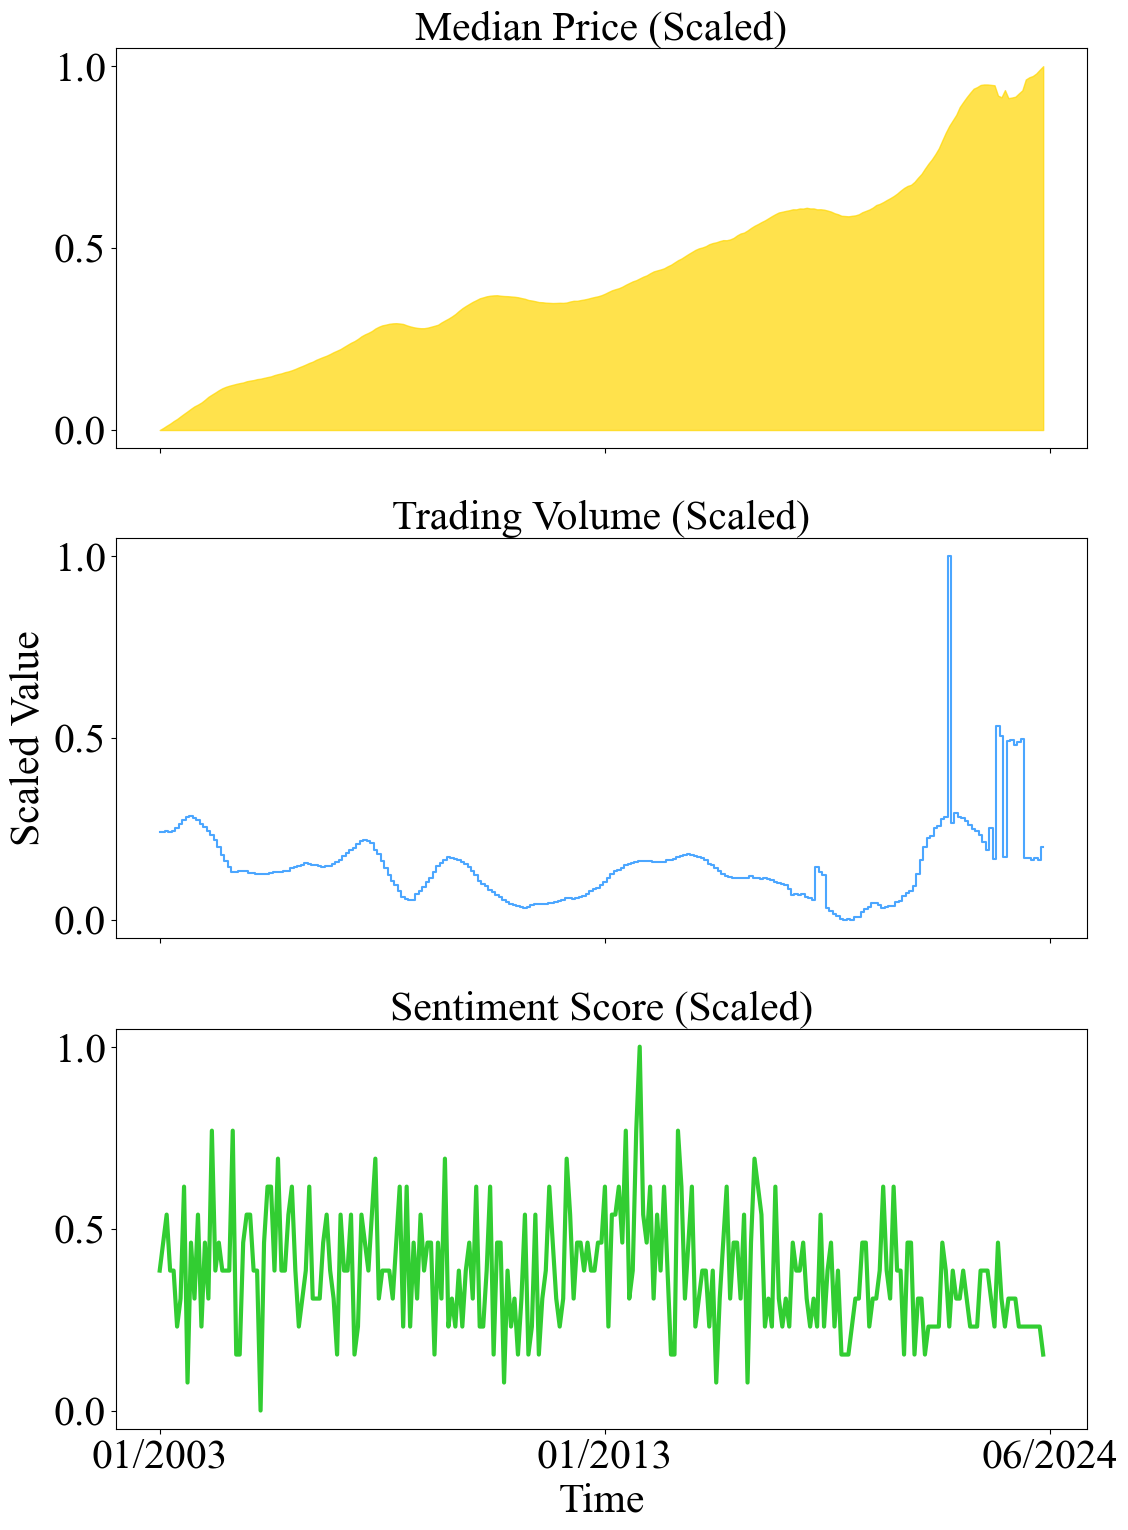

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataframes
df_price = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/df_RF_price_filtered.csv', header=0)
df_volume = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/df_RF_volume_filtered.csv', header=0)
df_sentiment = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/sentiment.csv', header=0)

# Drop the last row
df_price = df_price.iloc[:-1, :]
df_sentiment = df_sentiment.iloc[:-1, :]
df_volume = df_volume.iloc[:-1, :]

# Ensure the dataframes are not empty
assert not df_price.empty, "df_price is empty after dropping the last row"
assert not df_sentiment.empty, "df_sentiment is empty after dropping the last row"
assert not df_volume.empty, "df_volume is empty after dropping the last row"

# Convert data to numeric (if they are not already)
df_price = df_price.apply(pd.to_numeric, errors='coerce')
df_sentiment = df_sentiment.apply(pd.to_numeric, errors='coerce')
df_volume = df_volume.apply(pd.to_numeric, errors='coerce')

# Calculate the mean of rows
price_mean = df_price.mean(axis=1)
volume_mean = df_volume.mean(axis=1)
sentiment_mean = df_sentiment.mean(axis=1)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_price = scaler.fit_transform(price_mean.values.reshape(-1, 1))
scaled_sentiment = scaler.fit_transform(sentiment_mean.values.reshape(-1, 1))
scaled_volume = scaler.fit_transform(volume_mean.values.reshape(-1, 1))

# Generate date labels from 01/2003 to 06/2024
date_range = pd.date_range(start="2003-01-01", end="2024-06-01", freq='M')

# Ensure the date range length matches the data length
assert len(date_range) >= len(scaled_price), "Date range length is shorter than the data length"

# Define specific x-axis ticks and labels
x_ticks = [0, len(date_range) // 2, len(date_range) - 1]  # Positions: Start, Middle, End
x_labels = ["01/2003", "01/2013", "06/2024"]  # Labels at those positions

# Set global font size for labels
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})  # Update the font size and family

# Create subplots with different types of plots for each time series
fig, axs = plt.subplots(3, 1, figsize=(12, 16), sharex=True)

# Gold Price - Area Plot
axs[0].fill_between(range(len(scaled_price)), scaled_price.flatten(), color='#FFD700', alpha=0.7)  # Gold color
axs[0].set_title('Median Price (Scaled)', fontsize=30)
# axs[0].set_ylabel('Scaled Value')

# Volume - Step Plot
axs[1].step(range(len(scaled_volume)), scaled_volume.flatten(), label='Volume', color='#1E90FF', where='mid', alpha=0.8)  # Dodger blue
axs[1].set_title('Trading Volume (Scaled)', fontsize=30)
axs[1].set_ylabel('Scaled Value')

# Gold Sentiment - Line Plot
axs[2].plot(scaled_sentiment, label='Sentiment Score', color='#32CD32', linestyle='-', linewidth=3)  # Lime green
axs[2].set_title('Sentiment Score (Scaled)', fontsize=30)
# axs[2].set_ylabel('Scaled Value')

# Set x-axis ticks and labels
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=0)
axs[2].set_xlabel("Time")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


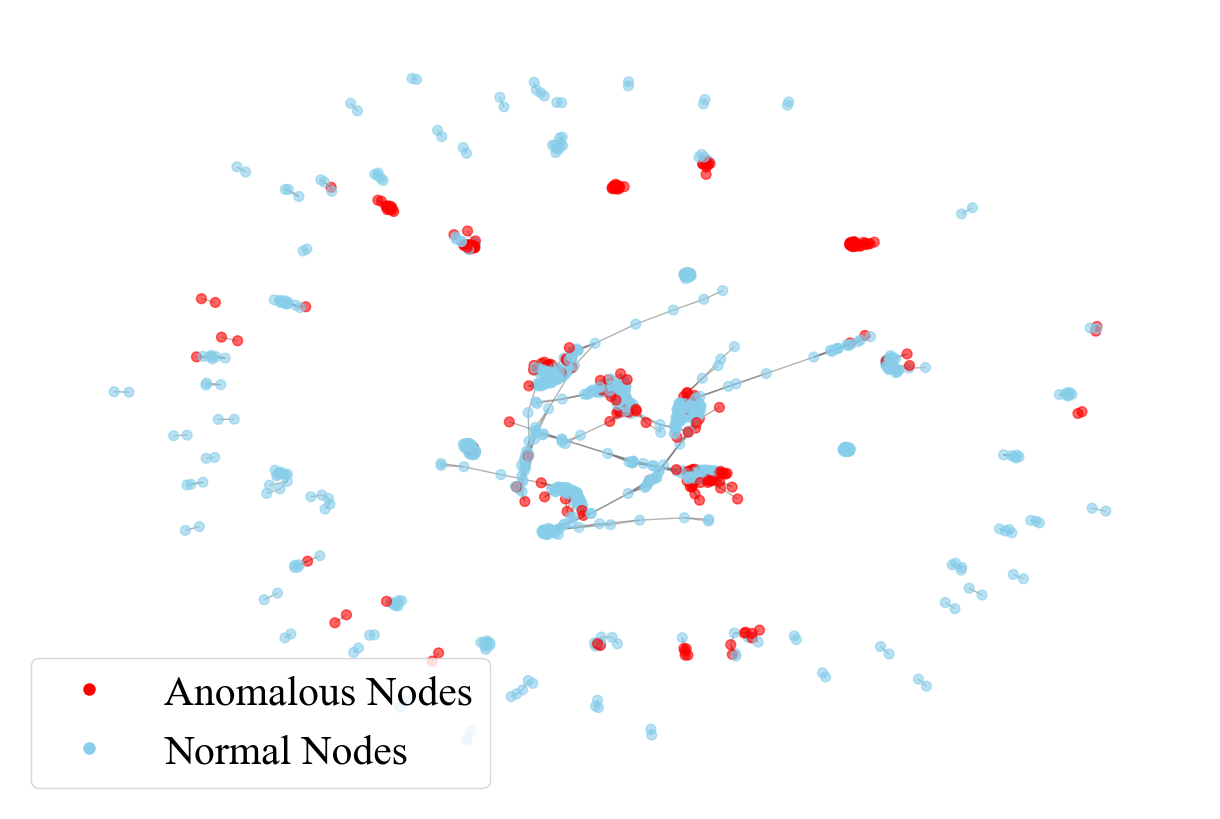

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming `all_anomalous_suburb_indices` contains the indices of all anomalous suburbs
# and `graph_data.edge_index` represents the edges in the GCN graph.

# Construct a NetworkX graph
edge_index = graph_data.edge_index.cpu().numpy()  # Convert PyTorch edge index to NumPy
G = nx.Graph()
for edge in edge_index.T:
    G.add_edge(edge[0], edge[1])

# Assign colors to nodes: anomalies (red), normal nodes (blue)
node_colors = []
for node in G.nodes:
    if node in all_anomalous_suburb_indices:
        node_colors.append('red')  # Anomalous node
    else:
        node_colors.append('skyblue')  # Normal node

# Visualize the graph
plt.figure(figsize=(12, 8))
nx.draw(
    G,
    node_size=50,  # Adjust node size
    node_color=node_colors,  # Assign colors for nodes
    edge_color='gray',  # Edge color
    alpha=0.6,  # Transparency
    with_labels=False  # No labels
)

# Add a legend for node colors
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Anomalous Nodes', markerfacecolor='red', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Normal Nodes', markerfacecolor='skyblue', markersize=10)
]
plt.legend(
    handles=legend_elements,
    loc='lower left',  # Set the legend to the bottom-left corner
    fontsize=12,  # Adjust legend font size here
    prop={'family': 'Times New Roman'}  # Set legend font to Times New Roman
)

# # Add a title with adjustable font size and Times New Roman font
# plt.title(
#     "GCN-Based Graph with Anomalies Highlighted",
#     fontsize=16,  # Adjust title font size here
#     fontname="Times New Roman"
# )

# Show the graph
plt.show()


In [ ]:
################ TRY NEW METHODS FOR NEXT PAPERS
################
################


In [19]:
############ clustering based K-means with the results from the clustering with anomalies section results
############
############

# Load and preprocess data
df_RF_price = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/df_RF_price_filtered.csv', header=0).T
df_RF_volume = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/df_RF_volume_filtered.csv', header=0).T
location_data = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/df_location_filtered.csv')
sentiment_scores = pd.read_csv('/Users/datle/Desktop/Deakin Uni/3rd paper code/filtered data AFTER COMBING WITH LOCATION/sentiment.csv', header=0).T

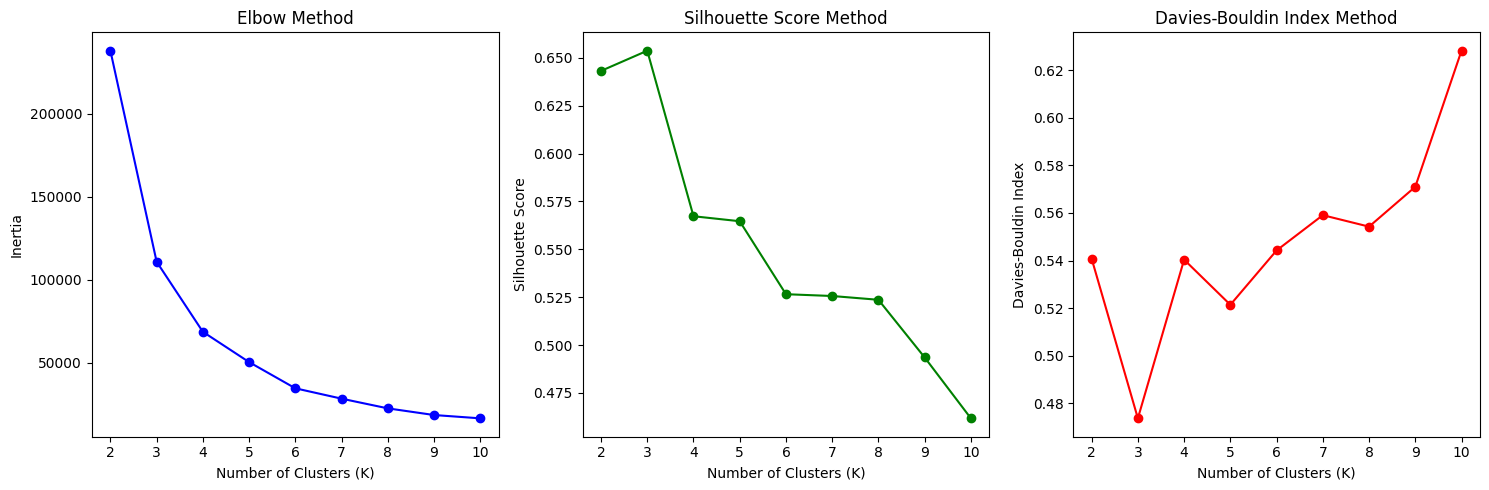

Optimal K Based on Elbow Method: 2
Optimal K Based on Silhouette Score: 3
Optimal K Based on Davies-Bouldin Index: 3


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Simulated Input Data for Example
# Use the reconstructed GCN features (replace this with actual GCN output for your data)
np.random.seed(42)
num_nodes = 100
num_features = 8
reconstructed_features = reconstructed  # Replace with actual GCN-reconstructed features

# Range of K values to test
k_values = range(2, 11)  # Check for K=2 to K=10

# Storage for evaluation metrics
inertia_values = []  # Elbow Method
silhouette_scores = []  # Silhouette Score
davies_bouldin_scores = []  # Davies-Bouldin Index

# Evaluate clustering for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reconstructed_features)
    
    # Elbow Method: Inertia (Sum of Squared Distances)
    inertia_values.append(kmeans.inertia_)
    
    # Silhouette Score: Higher is better (ranges -1 to 1)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(reconstructed_features, labels))
    
    # Davies-Bouldin Index: Lower is better
    davies_bouldin_scores.append(davies_bouldin_score(reconstructed_features, labels))

# Plot Results to Find Optimal K
plt.figure(figsize=(15, 5))

# Plot Elbow Method
plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, 'o-', color='blue')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Scores
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, 'o-', color='green')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_scores, 'o-', color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Method')

plt.tight_layout()
plt.show()

# Print Optimal K Based on Each Metric
optimal_k_elbow = k_values[np.argmin(np.diff(inertia_values))]
optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
optimal_k_davies_bouldin = k_values[np.argmin(davies_bouldin_scores)]

print("Optimal K Based on Elbow Method:", optimal_k_elbow)
print("Optimal K Based on Silhouette Score:", optimal_k_silhouette)
print("Optimal K Based on Davies-Bouldin Index:", optimal_k_davies_bouldin)

In [ ]:
####################################################################################
####################################################################################
####################################################################################
####################################################################################
####################################################################################


In [ ]:
####### THIS IS OUR FINAL METHOD, FORGET THE REST ABOVE, JUST FOR TESTING ########
####### THIS IS OUR FINAL METHOD, FORGET THE REST ABOVE, JUST FOR TESTING ########
####### THIS IS OUR FINAL METHOD, FORGET THE REST ABOVE, JUST FOR TESTING ########
####### THIS IS OUR FINAL METHOD, FORGET THE REST ABOVE, JUST FOR TESTING ########
####### THIS IS OUR FINAL METHOD, FORGET THE REST ABOVE, JUST FOR TESTING ########

In [1]:
"""
GCN + KAN for Time-Series Clustering

1) Loads data for price, volume, location, sentiment
2) Computes Jensen–Shannon Divergence (JSD) over rolling windows => "entropy_data"
3) Builds a graph with edges if distance < 50 km
4) Trains a GCN to reconstruct node features (autoencoder-style)
5) Feeds GCN embeddings into a Kolmogorov–Arnold Network (KAN) from pykan
6) Performs KMeans clustering on KAN embeddings
7) Visualizes the result on a map

Replace the file paths with your local CSV paths as needed.
"""

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from scipy import stats
from sklearn.cluster import KMeans
import geopandas as gpd
import matplotlib.pyplot as plt

from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics.pairwise import haversine_distances

# ------------------- Attempt to import pykan's KAN -------------------
try:
    # Common import pattern: from pykan.kan import KAN
    # Adjust if your local structure is different
    from kan import *
except ImportError:
    raise ImportError(
        "Could not import KAN from pykan. "
        "Please install the pykan package from https://github.com/KindXiaoming/pykan "
        "or adjust the import path if you have a local kan.py."
    )


# ------------------- Reproducibility -------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


# ------------------- 1) Data Loading & Preprocessing -------------------
# Update these file paths to your local environment
df_RF_price = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/price usa for clustering.csv', header=0).T
df_RF_volume = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/volume usa for clustering.csv', header=0).T
location_data = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/usa_city_coordinates.csv')
# sentiment_scores = pd.read_csv('', header=0).T

suburb_names = location_data.columns

# Optionally, you can normalize price/volume data here
# scaler = MinMaxScaler()
# df_RF_price = pd.DataFrame(scaler.fit_transform(df_RF_price), columns=df_RF_price.columns)
# df_RF_volume = pd.DataFrame(scaler.fit_transform(df_RF_volume), columns=df_RF_volume.columns)

price = df_RF_price.values   # shape [num_suburbs, time_length]
volume = df_RF_volume.values # shape [num_suburbs, time_length]


# ------------------- 2) Compute JSD (time-series window) -------------------
window_size = 24
num_windows = price.shape[1] - window_size + 1
jsd_windows = np.zeros((num_windows, price.shape[0]))  # shape [num_windows, num_suburbs]

for i in range(num_windows):
    window_prices = price[:, i : i + window_size]
    window_volumes = volume[:, i : i + window_size]
    jsd_pairs = np.zeros(price.shape[0])

    for j in range(price.shape[0]):
        try:
            price_pdf = stats.gaussian_kde(window_prices[j])
            volume_pdf = stats.gaussian_kde(window_volumes[j])
            p_dist = price_pdf(window_prices[j])
            v_dist = volume_pdf(window_volumes[j])
            avg_dist = 0.5 * (p_dist + v_dist)
            jsd = 0.5 * (entropy(p_dist, avg_dist) + entropy(v_dist, avg_dist))
            jsd_pairs[j] = jsd
        except np.linalg.LinAlgError:
            jsd_pairs[j] = 0

    jsd_windows[i] = jsd_pairs

# shape of precomputed_jsd => [num_windows, num_suburbs]
precomputed_jsd = pd.DataFrame(jsd_windows)

# We'll place the transposed version so each suburb is a row
# => shape [num_suburbs, num_windows]
entropy_data = torch.tensor(precomputed_jsd.values.T, dtype=torch.float32)



/Users/datle/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu
checkpoint directory created: ./model
saving model version 0.0

--- Clustering Results ---
              Suburb  Cluster
150  Bloomington, IL        1
81       Lansing, MI        1
238      Ardmore, OK        1
242       Tiffin, OH        1
243   Batesville, AR        1
..               ...      ...
66         Ogden, UT        3
60      Stockton, CA        3
56        Oxnard, CA        3
47        Fresno, CA        3
300        Craig, CO        3

[301 rows x 2 columns]

Number of suburbs in each cluster (1-based):
Cluster
1     91
2    167
3     43
Name: count, dtype: int64


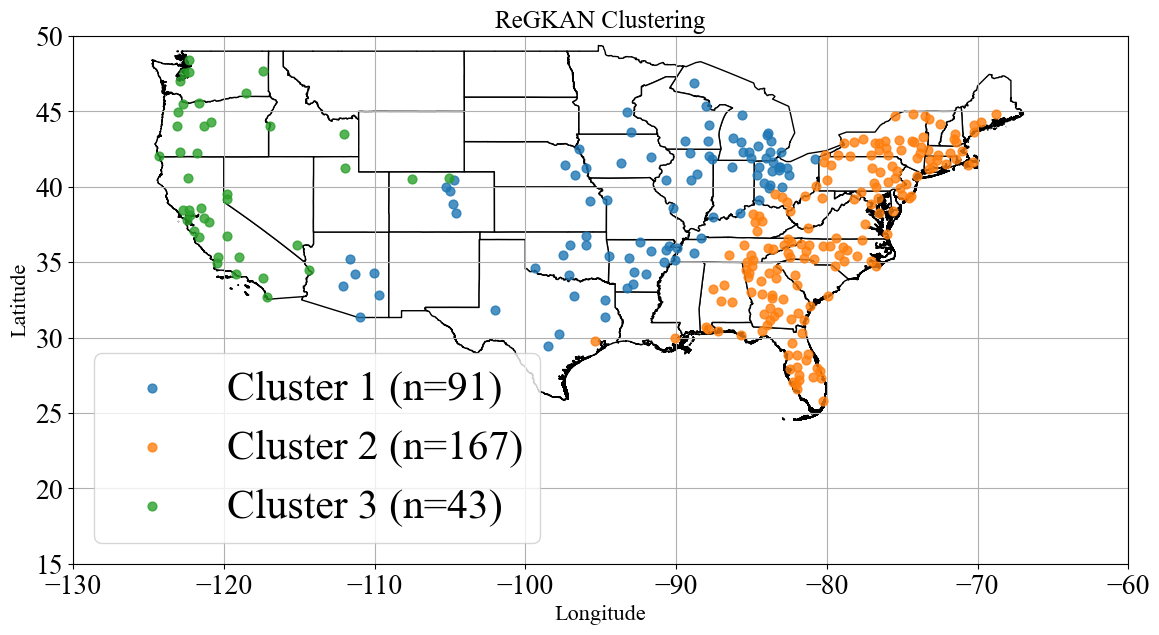


--- Internal Validation: GCN+KAN ---
{'Silhouette': 0.58917713, 'Davies-Bouldin': 0.5198129728954247, 'Calinski-Harabasz': 1034.0785193963097}


In [35]:
import random
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from sklearn.metrics.pairwise import haversine_distances
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.cluster import KMeans

# Seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

cudnn.deterministic = True
cudnn.benchmark = False

# Set Times New Roman & Font Size
############################
plt.rcParams['font.family'] = 'Times New Roman'  # Use Times New Roman
plt.rcParams['font.size'] = 14                   # Adjust font size here if needed

# ------------------- Construct the Graph (GCN) -------------------
latitude = location_data.iloc[0].values   # shape [num_suburbs]
longitude = location_data.iloc[1].values # shape [num_suburbs]
location_features = np.column_stack((latitude, longitude))  # shape [num_suburbs, 2]

lat_lon_radians = np.radians(location_features)
distances = haversine_distances(lat_lon_radians, lat_lon_radians) * 6371  # in km

distance_threshold = 10
edge_index_np = np.array(np.where(distances < distance_threshold))
edge_index_np = edge_index_np[:, edge_index_np[0] != edge_index_np[1]]
edge_index = torch.tensor(edge_index_np, dtype=torch.long)

# Combine the JSD-based "entropy_data" with the 2D location features
node_features = np.hstack((entropy_data, location_features))
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)

graph_data = Data(x=node_features_tensor, edge_index=edge_index)

# ------------------- GCN Model -------------------
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_idx = data.x, data.edge_index
        x = self.conv1(x, edge_idx)
        x = F.relu(x)
        x = self.conv2(x, edge_idx)
        return x  # shape [num_nodes, out_channels]

# Train a simple GCN autoencoder to reconstruct node features
gcn_model = GCN(
    in_channels=node_features_tensor.shape[1],
    hidden_channels=32,
    out_channels=node_features_tensor.shape[1]
)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

gcn_model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = gcn_model(graph_data)  # shape [num_suburbs, out_dim]
    loss = criterion(output, graph_data.x)
    loss.backward()
    optimizer.step()

gcn_model.eval()
with torch.no_grad():
    gcn_embeddings = gcn_model(graph_data).numpy()  # shape [num_suburbs, out_dim]

# We'll do a simple wrapper to combine pykan KAN + final linear
# Gird should be equal or larger than the number of features used in multivariate (like use gold and price -> grid should be 3)
# Start from a simple setup (small KAN shape, small grid size, small data, no reguralization lamb=0). 
# This is very different from MLP literature, where people by default use widths of order O(10^2) or higher. 
# For example, if you have a task with 5 inputs and 1 outputs, I would try something as simple as KAN(width=[5,1,1], grid=3, k=3). 
# If it doesn't work, I would gradually first increase width. If that still doesn't work,
# I would consider increasing depth (k). You don't need to be this extreme, if you have better understanding about the complexity of your task.
# https://kindxiaoming.github.io/pykan/kan.html#kan.MultKAN.MultKAN.expand_depth
# https://kindxiaoming.github.io/pykan/Example/Example_1_function_fitting.html
# ------------------- KAN -------------------
from kan import KAN

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

gcn_embeddings_tensor = torch.tensor(gcn_embeddings, dtype=torch.float32, device=device)

in_dim = gcn_embeddings.shape[1]
out_dim = 32

class KAN_Encoder(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        self.kan = KAN(width=[in_dim, 1, 1], grid=1, k=1, seed=seed, device=device) ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### ##### #####
        self.final_fc = nn.Linear(1, hidden_dim)

    def forward(self, x):
        y_kan = self.kan(x)
        y_out = self.final_fc(y_kan)
        return y_out

kan_encoder = KAN_Encoder(in_dim, out_dim).to(device)
kan_encoder.eval()
with torch.no_grad():
    kan_embeddings_torch = kan_encoder(gcn_embeddings_tensor)
    kan_embeddings = kan_embeddings_torch.cpu().numpy()

# ------------------- K-Means Clustering -------------------
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(kan_embeddings)

# Adjust cluster labels to start from 1
cluster_labels = cluster_labels + 1

# Create a DataFrame to hold the results
cluster_results = pd.DataFrame({'Suburb': suburb_names, 'Cluster': cluster_labels})

# Count how many suburbs per cluster
cluster_counts = cluster_results['Cluster'].value_counts().sort_index()

print("\n--- Clustering Results ---")
print(cluster_results.sort_values(by='Cluster'))
print("\nNumber of suburbs in each cluster (1-based):")
print(cluster_counts)


# ------------------- Visualization on Map -------------------
def plot_clusters_on_map(location_data, cluster_labels, shapefile_path):
    # Ensure Times New Roman is applied
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 20

    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    australia_map = gpd.read_file(shapefile_path)

    fig, ax = plt.subplots(figsize=(12, 10))
    australia_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)
    

    ax.set_xlim(-130, -60)  # Longitude range
    ax.set_ylim(15, 50)     # Latitude range
    
    unique_clusters = np.unique(cluster_labels)
    for cluster_val in unique_clusters:
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster_val]
        size = len(cluster_data)
        label_text = f"Cluster {cluster_val} (n={size})"
        cluster_data.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=16)
    plt.ylabel("Latitude", fontsize=16)
    plt.title("ReGKAN Clustering", fontsize=18)
    plt.legend(fontsize=30) #____________________________________________________________________________________________________________
    plt.grid()
    plt.tight_layout()
    plt.show()


# Replace with your shapefile path
shapefile_path = '/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/gadm41_USA_shp/gadm41_USA_1.shp'
plot_clusters_on_map(location_data, cluster_labels, shapefile_path)

# ------------------- Clustering Evaluation -------------------
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_internal(features, labels):
    sil = silhouette_score(features, labels)
    dbi = davies_bouldin_score(features, labels)
    chi = calinski_harabasz_score(features, labels)
    return {
        "Silhouette": sil,
        "Davies-Bouldin": dbi,
        "Calinski-Harabasz": chi
    }

scores_gcn_kan = evaluate_internal(kan_embeddings, cluster_labels)
print("\n--- Internal Validation: GCN+KAN ---")
print(scores_gcn_kan)

In [41]:
import pandas as pd

# Suppose you also have a list of suburb names
df_kan_results = pd.DataFrame({
    "Suburb": suburb_names,    # or any relevant identifying column(s)
    "Cluster": cluster_labels  # the numpy array of cluster assignments
})

df_kan_results.to_csv("kan_clustering_results_USA.csv", index=False)
print("Saved 'kan_clustering_results_USA.csv'.")

Saved 'kan_clustering_results_USA.csv'.


Epoch 0, Loss: 59.97837448120117
Epoch 10, Loss: 31.577533721923828
Epoch 20, Loss: 6.97706937789917
Epoch 30, Loss: 2.919700860977173
Epoch 40, Loss: 1.1055699586868286
Epoch 50, Loss: 0.6986684203147888
Epoch 60, Loss: 0.47804656624794006
Epoch 70, Loss: 0.41668272018432617
Epoch 80, Loss: 0.3906722664833069
Epoch 90, Loss: 0.38695457577705383


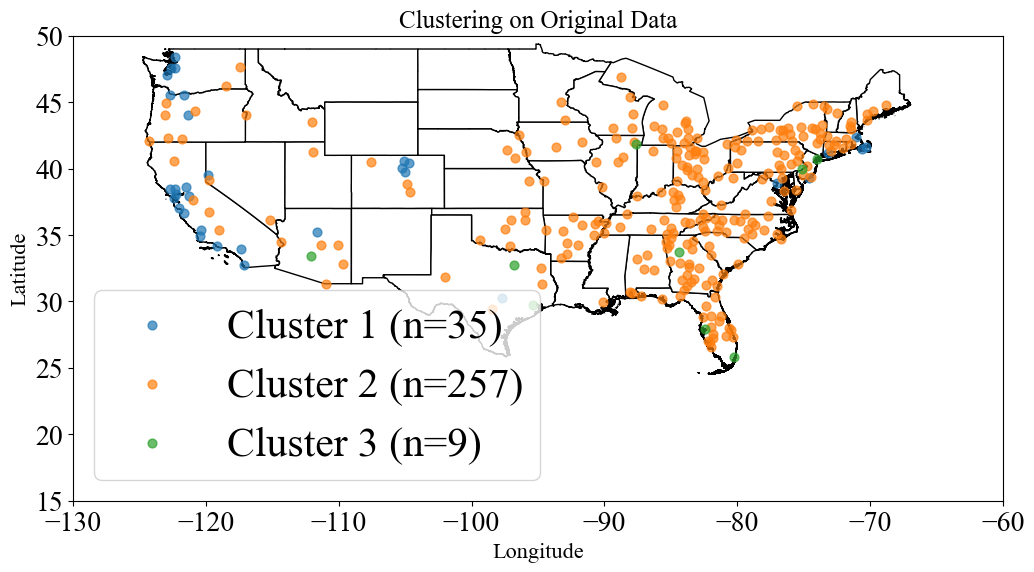

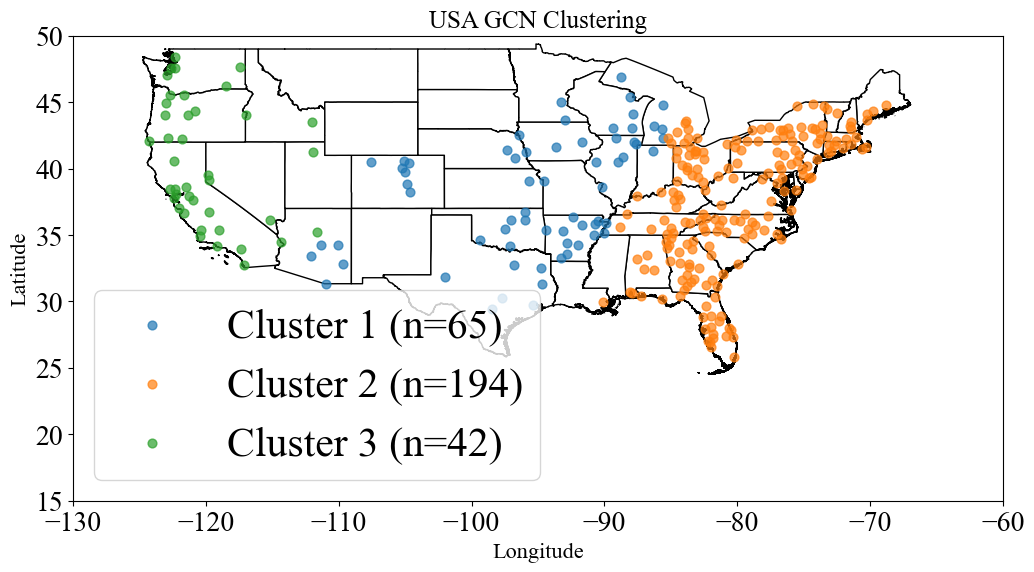

Silhouette Score (Original Data): 0.670
Silhouette Score (GCN Embeddings): 0.635


In [44]:
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.metrics.pairwise import haversine_distances
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.metrics import silhouette_score

# ------------------- Reproducibility -------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ------------------- 1) Data Loading -------------------
# Load datasets
df_RF_price = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/price usa for clustering.csv', header=0).T
df_RF_volume = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/volume usa for clustering.csv', header=0).T
location_data = pd.read_csv('/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/usa_city_coordinates.csv')
# sentiment_scores = pd.read_csv('', header=0).T

suburb_names = location_data.columns

# Extract data
price = df_RF_price.values   # shape [num_suburbs, time_length]
volume = df_RF_volume.values # shape [num_suburbs, time_length]
# sentiment = sentiment_scores.values  # shape [num_suburbs, time_length]

# Combine features for clustering (price, volume, sentiment)
original_features = np.hstack((price, volume))  # shape [num_suburbs, time_length * 3]

# Normalize features
scaler = MinMaxScaler()
original_features_normalized = scaler.fit_transform(original_features)

# ------------------- 2) Clustering on Original Data -------------------
num_clusters = 3  # Set number of clusters
kmeans_original = KMeans(n_clusters=num_clusters, random_state=seed)
original_labels = kmeans_original.fit_predict(original_features_normalized)

# ------------------- 3) Construct Graph for GCN -------------------
latitude = location_data.iloc[0].values   # shape [num_suburbs]
longitude = location_data.iloc[1].values # shape [num_suburbs]
location_features = np.column_stack((latitude, longitude))  # shape [num_suburbs, 2]

# Compute haversine distances
lat_lon_radians = np.radians(location_features)
distances = haversine_distances(lat_lon_radians, lat_lon_radians) * 6371  # in km

# Set a threshold for edge creation
distance_threshold = 10
edge_index_np = np.array(np.where(distances < distance_threshold))
edge_index_np = edge_index_np[:, edge_index_np[0] != edge_index_np[1]]  # Remove self-loops
edge_index = torch.tensor(edge_index_np, dtype=torch.long)

# Combine price, volume, sentiment, and location features
node_features = np.hstack((original_features_normalized, location_features))
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)

graph_data = Data(x=node_features_tensor, edge_index=edge_index)

# ------------------- 4) Define GCN Model -------------------
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, embed_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)  # First GCN layer
        self.conv2 = GCNConv(hidden_channels, embed_channels)  # Embedding layer
        self.conv3 = GCNConv(embed_channels, out_channels)  # Reconstruction layer

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)  # Embedding step
        x = F.relu(x)
        x = self.conv3(x, edge_index)  # Reconstruction step
        return x

# ------------------- 5) Train GCN -------------------
# Instantiate the GCN Model
gcn_model = GCN(
    in_channels=node_features_tensor.shape[1],  # Input feature size (e.g., 770 in this case)
    hidden_channels=64,  # Hidden layer size
    embed_channels=16,  # Embedding dimension for clustering
    out_channels=node_features_tensor.shape[1]  # Output size matches input for reconstruction
)

optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Train the model
gcn_model.train()
for epoch in range(100):  # Number of epochs
    optimizer.zero_grad()
    output = gcn_model(graph_data)  # Forward pass through the entire model
    loss = criterion(output, graph_data.x)  # Reconstruction loss
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:  # Print loss every 10 epochs
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Extract embeddings
gcn_model.eval()
with torch.no_grad():
    embeddings = gcn_model(graph_data)  # Forward pass through the model
    gcn_embeddings = embeddings.cpu().numpy()  # Extract embeddings from the second layer

# ------------------- 6) Clustering on GCN Embeddings -------------------
kmeans_gcn = KMeans(n_clusters=num_clusters, random_state=seed)
gcn_labels = kmeans_gcn.fit_predict(gcn_embeddings)

# ------------------- 7) Visualization -------------------
def plot_clusters(location_data, labels, title, shapefile_path):
    # Ensure Times New Roman is applied
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 20
    # Prepare data for plotting
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    # Load Australia shapefile
    australia_map = gpd.read_file(shapefile_path)

    # Plot map
    fig, ax = plt.subplots(figsize=(12, 10))
    australia_map.plot(ax=ax, color='white', edgecolor='black')
    for cluster in np.unique(labels):
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        cluster_data.plot(ax=ax, markersize=40, label=f"Cluster {cluster + 1} (n={len(cluster_data)})", alpha=0.7)

    ax.set_xlim(-130, -60)  # Longitude range
    ax.set_ylim(15, 50)     # Latitude range

    plt.xlabel("Longitude", fontsize=16)
    plt.ylabel("Latitude", fontsize=16)
    plt.title(title, fontsize=18)
    plt.legend(fontsize=30) #____________________________________________________________________________________________________________
    plt.show()

# Plot clustering results
shapefile_path = '/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/gadm41_USA_shp/gadm41_USA_1.shp'
plot_clusters(location_data, original_labels, "Clustering on Original Data", shapefile_path)
plot_clusters(location_data, gcn_labels, "USA GCN Clustering", shapefile_path)

# ------------------- 8) Evaluation -------------------
# Evaluate clustering quality
original_silhouette = silhouette_score(original_features_normalized, original_labels)
gcn_silhouette = silhouette_score(gcn_embeddings, gcn_labels)

print(f"Silhouette Score (Original Data): {original_silhouette:.3f}")
print(f"Silhouette Score (GCN Embeddings): {gcn_silhouette:.3f}")

In [42]:
# Convert gcn_labels to a DataFrame
gcn_labels_df = pd.DataFrame(gcn_labels)

# Rename columns appropriately (assuming alternating order: Suburb, Cluster)
gcn_labels_df.columns = ['Suburb']

# Save to CSV
output_csv_path = "gcn_labels_with_clusters.csv"
gcn_labels_df.to_csv(output_csv_path, index=False)

print(f"GCN labels and clusters saved to {output_csv_path}")

GCN labels and clusters saved to gcn_labels_with_clusters.csv


/Users/datle/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


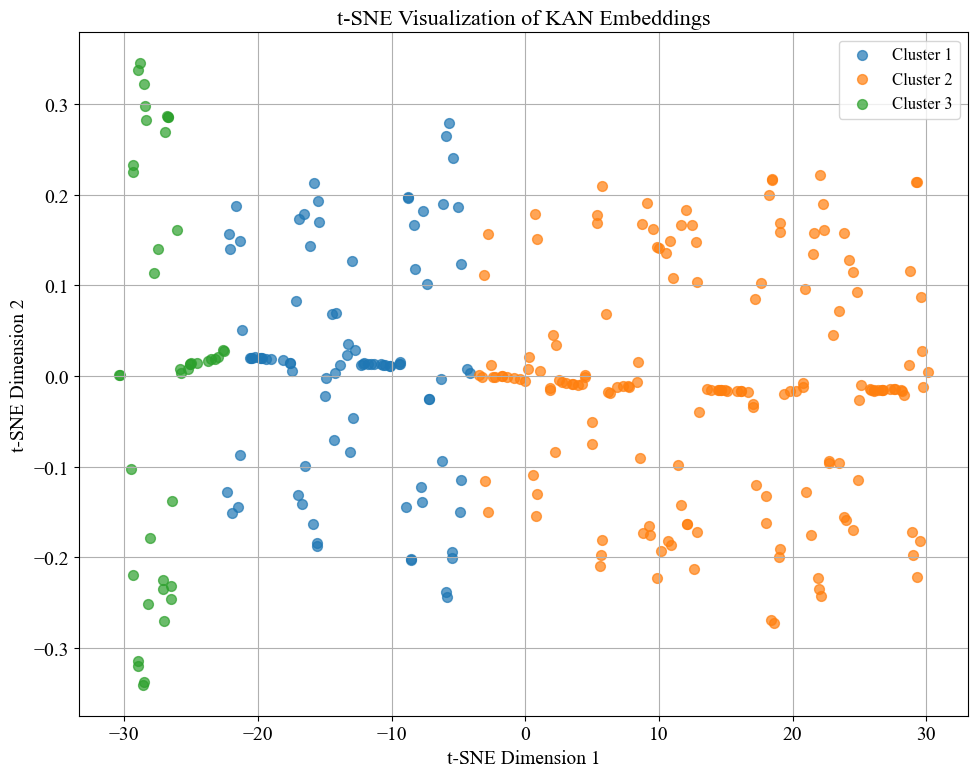

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_tsne(kan_embeddings, cluster_labels, num_clusters):
    """
    Visualizes KAN embeddings using t-SNE.

    Args:
        kan_embeddings: Numpy array of KAN embeddings for each node (shape: [num_nodes, embedding_dim]).
        cluster_labels: List or array of cluster labels for each node.
        num_clusters: Total number of clusters.
    """
    # Perform t-SNE dimensionality reduction (reduce to 2D)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(kan_embeddings)  # Shape: [num_nodes, 2]

    # Assign colors to clusters
    try:
        cluster_colors = plt.get_cmap('tab10', num_clusters)  # For newer matplotlib versions
    except TypeError:
        cluster_colors = plt.cm.tab10  # Fallback for older versions

    # Create a scatter plot
    plt.figure(figsize=(10, 8))
    for cluster in range(1, num_clusters + 1):
        cluster_points = tsne_results[np.array(cluster_labels) == cluster]
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1], 
            label=f'Cluster {cluster}',
            alpha=0.7,
            s=50
        )

    # Add title and legend
    plt.title("t-SNE Visualization of KAN Embeddings", fontsize=16)
    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()

    # Show plot
    plt.show()


# Example usage
visualize_tsne(
    kan_embeddings=kan_embeddings,  # KAN embeddings (shape: [num_nodes, embedding_dim])
    cluster_labels=cluster_labels,  # Cluster labels from KMeans
    num_clusters=num_clusters       # Number of clusters
)


--- Clustering Results (GCN Only) ---
                   Suburb  Cluster
300             Craig, CO        1
123        Santa Cruz, CA        1
122         Bremerton, WA        1
254           Nogales, AZ        1
119   San Luis Obispo, CA        1
..                    ...      ...
210         Manitowoc, WI        3
209        Stillwater, OK        3
207           Midland, MI        3
62   Colorado Springs, CO        3
150       Bloomington, IL        3

[301 rows x 2 columns]

Number of suburbs in each cluster (1-based):
Cluster
1     48
2    186
3     67
Name: count, dtype: int64


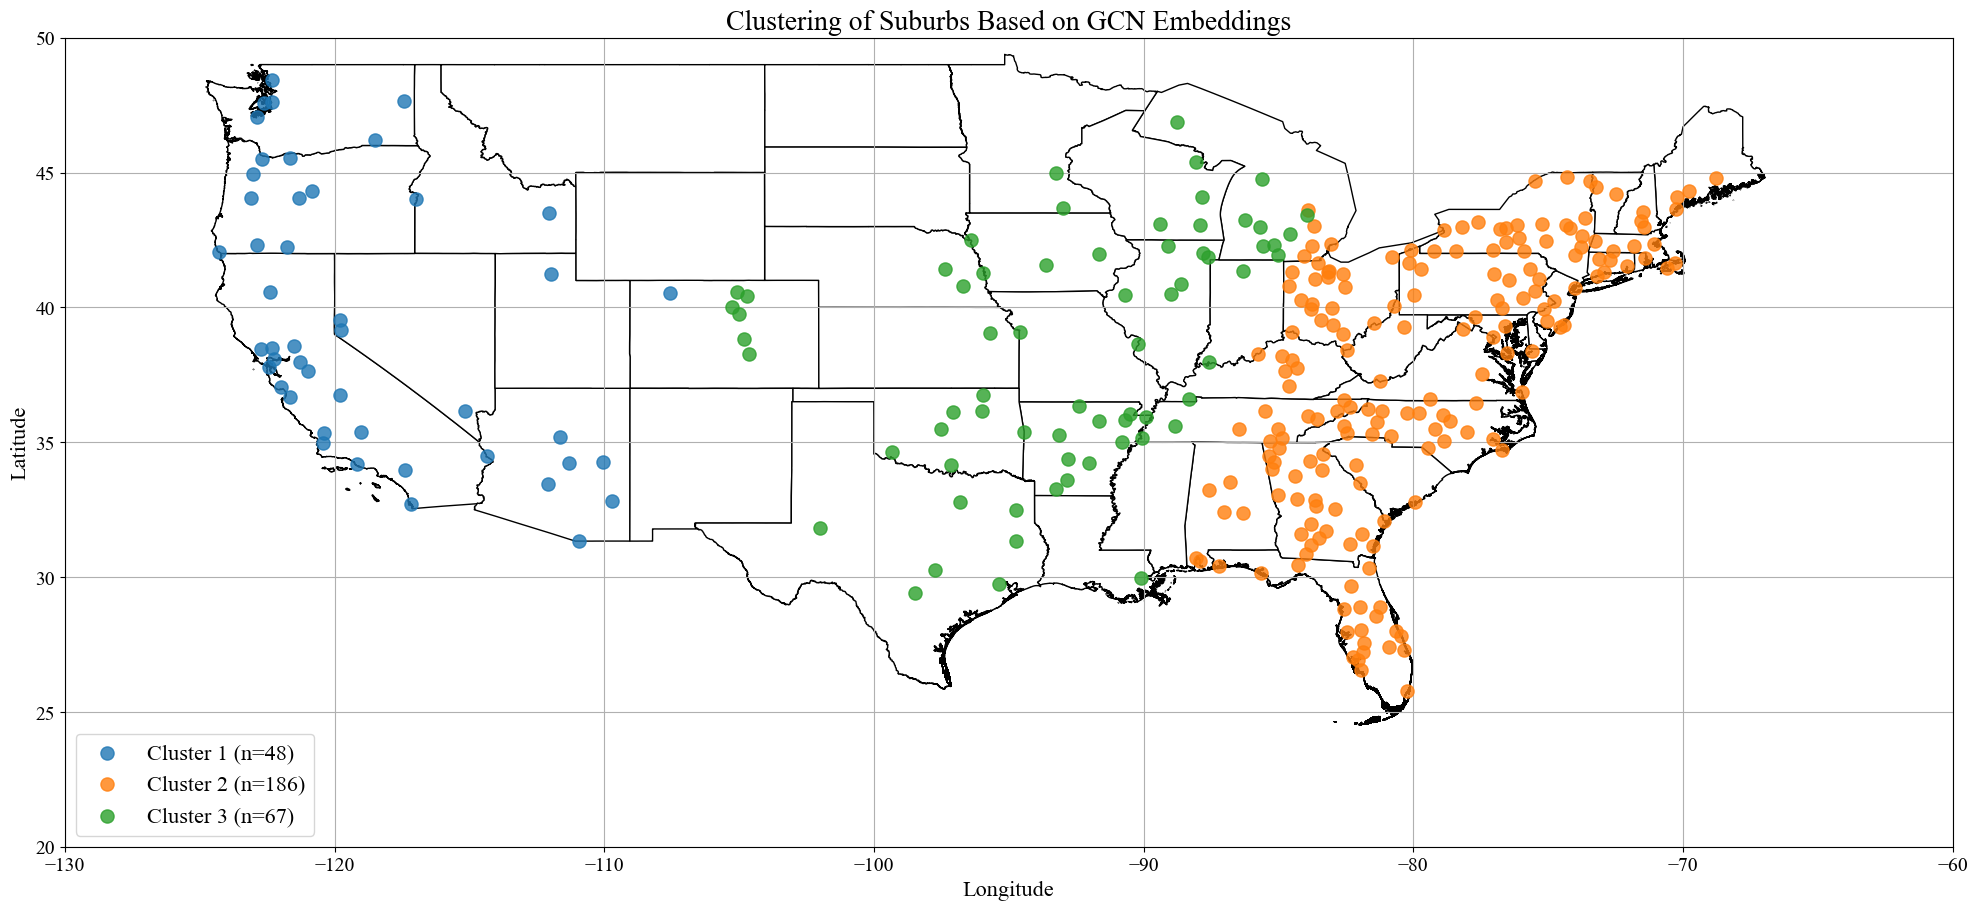


--- Internal Validation (GCN Only) ---
{'Silhouette': 0.59594727, 'Davies-Bouldin': 0.5077542534197216, 'Calinski-Harabasz': 1172.454473842436}


In [16]:
import random
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from sklearn.metrics.pairwise import haversine_distances
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Seed for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
cudnn.deterministic = True
cudnn.benchmark = False

# Set Times New Roman & Font Size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

# ------------------- Construct the Graph (GCN) -------------------
latitude = location_data.iloc[0].values   # shape [num_suburbs]
longitude = location_data.iloc[1].values # shape [num_suburbs]
location_features = np.column_stack((latitude, longitude))  # shape [num_suburbs, 2]

lat_lon_radians = np.radians(location_features)
distances = haversine_distances(lat_lon_radians, lat_lon_radians) * 6371  # in km

distance_threshold = 10
edge_index_np = np.array(np.where(distances < distance_threshold))
edge_index_np = edge_index_np[:, edge_index_np[0] != edge_index_np[1]]
edge_index = torch.tensor(edge_index_np, dtype=torch.long)

# Combine the JSD-based "entropy_data" with the 2D location features
node_features = np.hstack((entropy_data, location_features))
node_features_tensor = torch.tensor(node_features, dtype=torch.float32)

graph_data = Data(x=node_features_tensor, edge_index=edge_index)

# ------------------- GCN Model -------------------
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_idx = data.x, data.edge_index
        x = self.conv1(x, edge_idx)
        x = F.relu(x)
        x = self.conv2(x, edge_idx)
        return x  # shape [num_nodes, out_channels]

# Train a simple GCN autoencoder to reconstruct node features
gcn_model = GCN(
    in_channels=node_features_tensor.shape[1],
    hidden_channels=16,
    out_channels=node_features_tensor.shape[1]
)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

gcn_model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = gcn_model(graph_data)  # shape [num_suburbs, out_dim]
    loss = criterion(output, graph_data.x)
    loss.backward()
    optimizer.step()

gcn_model.eval()
with torch.no_grad():
    gcn_embeddings = gcn_model(graph_data).numpy()  # shape [num_suburbs, out_dim]

# ------------------- K-Means Clustering -------------------
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(gcn_embeddings)

# Adjust cluster labels to start from 1
cluster_labels = cluster_labels + 1

# Create a DataFrame to hold the results
cluster_results = pd.DataFrame({'Suburb': suburb_names, 'Cluster': cluster_labels})

# Count how many suburbs per cluster
cluster_counts = cluster_results['Cluster'].value_counts().sort_index()

print("\n--- Clustering Results (GCN Only) ---")
print(cluster_results.sort_values(by='Cluster'))
print("\nNumber of suburbs in each cluster (1-based):")
print(cluster_counts)

# ------------------- Visualization -------------------
def plot_clusters_on_map(location_data, cluster_labels, shapefile_path, figsize=(12, 10), font_size=16):
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    # Load the shapefile
    usa_map = gpd.read_file(shapefile_path)

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    usa_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    unique_clusters = np.unique(cluster_labels)
    for cluster_val in unique_clusters:
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster_val]
        size = len(cluster_data)
        label_text = f"Cluster {cluster_val} (n={size})"
        cluster_data.plot(ax=ax, markersize=90, label=label_text, alpha=0.8, zorder=2)

    ax.set_xlim(-130, -60)  # Longitude range
    ax.set_ylim(20, 50)     # Latitude range

    # Add labels and title
    plt.xlabel("Longitude", fontsize=font_size)
    plt.ylabel("Latitude", fontsize=font_size)
    plt.title("Clustering of Suburbs Based on GCN Embeddings", fontsize=font_size + 4)

    # Set legend in the lower-left corner
    plt.legend(fontsize=font_size, loc="lower left")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Replace with your shapefile path
shapefile_path = '/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/gadm41_USA_shp/gadm41_USA_1.shp'
plot_clusters_on_map(location_data, cluster_labels, shapefile_path, figsize=(20, 14), font_size=16)

# ------------------- Clustering Evaluation -------------------
def evaluate_internal(features, labels):
    sil = silhouette_score(features, labels)
    dbi = davies_bouldin_score(features, labels)
    chi = calinski_harabasz_score(features, labels)
    return {
        "Silhouette": sil,
        "Davies-Bouldin": dbi,
        "Calinski-Harabasz": chi
    }

scores_gcn_only = evaluate_internal(gcn_embeddings, cluster_labels)
print("\n--- Internal Validation (GCN Only) ---")
print(scores_gcn_only)

In [17]:
48+186+67

301

In [ ]:
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------

In [ ]:
# CODE TO FIND BEST PARAMETER FOR KAN --------------------------------------------------
# CODE TO FIND BEST PARAMETER FOR KAN
# CODE TO FIND BEST PARAMETER FOR KAN
# CODE TO FIND BEST PARAMETER FOR KAN
# CODE TO FIND BEST PARAMETER FOR KAN

# Interpretation:
# 	•	High Silhouette → clusters are well separated and cohesive.
# 	•	Low Davies–Bouldin → clusters are distinct.
# 	•	High Calinski–Harabasz → cluster separation is large.
# 	•	High ARI or NMI between two methods → they produce similar partitions.
# 	•	ARI/NMI near zero → they disagree about the cluster assignments."

import torch
import torch.backends.cudnn as cudnn

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

cudnn.deterministic = True
cudnn.benchmark = False


import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# If your local import is different, adjust accordingly
try:
    from kan import KAN
except ImportError:
    raise ImportError("Install or adjust import for pykan's KAN.")

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# ------------- Reproducibility -------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# ------------- 1) GCN part (unchanged) -------------
# We'll assume you already computed:
#   node_features_tensor: shape [num_nodes, num_features]
#   edge_index: shape [2, num_edges]
# from your "entropy_data" + location features

graph_data = Data(x=node_features_tensor, edge_index=edge_index)

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_idx = data.x, data.edge_index
        x = self.conv1(x, edge_idx)
        x = F.relu(x)
        x = self.conv2(x, edge_idx)
        return x

# Train the GCN as an autoencoder
gcn_model = GCN(
    in_channels=node_features_tensor.shape[1],
    hidden_channels=32,
    out_channels=node_features_tensor.shape[1]
)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Simple training loop
gcn_model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = gcn_model(graph_data)
    loss = criterion(output, graph_data.x)
    loss.backward()
    optimizer.step()

gcn_model.eval()
with torch.no_grad():
    gcn_embeddings = gcn_model(graph_data).cpu().numpy()  # shape [num_nodes, out_dim]

# ------------- 2) KAN + final linear -------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

gcn_embeddings_torch = torch.tensor(gcn_embeddings, dtype=torch.float32, device=device)

in_dim = gcn_embeddings.shape[1]  # e.g. 239
out_dim = 16                     # final dimension for clustering

# We'll define a small class that can vary x, y in KAN(width=[x,1,1], grid=1, k=y,...)
class KAN_Encoder(nn.Module):
    def __init__(self, in_dim, hidden_dim, x, y):
        super().__init__()
        # KAN with width=[x,1,1], grid=1, k=y
        self.kan = KAN(width=[x, 1, 1], grid=1, k=y, seed=seed, device=device)
        # map from [N,1] -> [N, hidden_dim]
        self.final_fc = nn.Linear(1, hidden_dim)

    def forward(self, x):
        y_kan = self.kan(x)     # shape [N,1]
        y_out = self.final_fc(y_kan)  # shape [N, hidden_dim]
        return y_out

# ------------- 3) Loop over x, y in [1..10], cluster, evaluate -------------
results = []

for x_val in range(1, 11):
    for y_val in range(1, 11):
        # Build the KAN_Encoder
        kan_encoder = KAN_Encoder(in_dim, out_dim, x_val, y_val).to(device)
        kan_encoder.eval()

        # Inference
        with torch.no_grad():
            kan_embeddings_torch = kan_encoder(gcn_embeddings_torch)  # [num_nodes, out_dim=16]
            kan_embeddings = kan_embeddings_torch.cpu().numpy()

        # KMeans
        num_clusters = 3
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        cluster_labels = kmeans.fit_predict(kan_embeddings)

        # Evaluate internal clustering metrics
        sil = silhouette_score(kan_embeddings, cluster_labels)
        dbi = davies_bouldin_score(kan_embeddings, cluster_labels)
        chi = calinski_harabasz_score(kan_embeddings, cluster_labels)

        # Store x_val, y_val, metrics
        results.append([
            x_val,
            y_val,
            sil,
            dbi,
            chi
        ])

# ------------- 4) Convert to DataFrame and print -------------
df_results = pd.DataFrame(results, columns=["x", "y", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz"])
print(df_results)

# Optional: save to CSV for further analysis
df_results.to_csv("kan_x_y_search_results.csv", index=False)

# ------------- (Optional) Identify best or analyze patterns -------------
# For example, you might sort by Silhouette descending:
df_sorted_sil = df_results.sort_values("Silhouette", ascending=False)
print("\nTop Silhouette entries:\n", df_sorted_sil.head(10))

Using device: cpu
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model
saving model version 0.0
checkpoint directory created: ./model

In [ ]:
############
############
############

In [18]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
from scipy.stats import entropy
from sklearn.metrics.pairwise import haversine_distances

from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

# Optional: install these if needed:
# !pip install hdbscan node2vec torch-geometric geopandas

def load_data(
    price_csv="/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/price usa for clustering.csv",
    volume_csv="//Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/volume usa for clustering.csv",
    location_csv="/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/usa_city_coordinates.csv",
    window_size=24,
    distance_threshold=10
):
    """
    Loads CSVs for price, volume, location.
    Computes JSD-based node features using rolling windows of size `window_size`.
    Builds adjacency for edges if distance < `distance_threshold` km.
    Returns:
      G_nx          : NetworkX graph
      node_features : [num_suburbs, num_windows] JSD-based features
      location_data : original DataFrame of lat/lon (for map plotting)
      suburb_names  : list of node names
      data_pyg      : PyTorch Geometric Data object (edge_index, x=node_features)
    """
    # Read CSVs
    df_RF_price = pd.read_csv(price_csv, header=0).T
    df_RF_volume = pd.read_csv(volume_csv, header=0).T
    location_data = pd.read_csv(location_csv)

    suburb_names = location_data.columns
    price = df_RF_price.values
    volume = df_RF_volume.values

    # Compute JSD
    num_windows = price.shape[1] - window_size + 1
    jsd_windows = np.zeros((num_windows, price.shape[0]))  # [time_windows, num_suburbs]

    for i in range(num_windows):
        window_prices = price[:, i : i + window_size]
        window_volumes = volume[:, i : i + window_size]
        jsd_pairs = np.zeros(price.shape[0])
        for j in range(price.shape[0]):
            try:
                price_pdf = stats.gaussian_kde(window_prices[j])
                volume_pdf = stats.gaussian_kde(window_volumes[j])
                p_dist = price_pdf(window_prices[j])
                v_dist = volume_pdf(window_volumes[j])
                avg_dist = 0.5 * (p_dist + v_dist)
                jsd_val = 0.5 * (entropy(p_dist, avg_dist) + entropy(v_dist, avg_dist))
                jsd_pairs[j] = jsd_val
            except np.linalg.LinAlgError:
                jsd_pairs[j] = 0
        jsd_windows[i] = jsd_pairs

    node_features = jsd_windows.T  # shape: [num_suburbs, num_windows]

    # Build adjacency from lat/lon
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    lat_lon_radians = np.radians(np.column_stack((latitude, longitude)))
    distances = haversine_distances(lat_lon_radians, lat_lon_radians) * 6371

    row_idx, col_idx = np.where(distances < distance_threshold)
    mask = row_idx != col_idx
    row_idx = row_idx[mask]
    col_idx = col_idx[mask]

    # Create a NetworkX graph
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(len(suburb_names)))
    for r, c in zip(row_idx, col_idx):
        G_nx.add_edge(r, c)

    # Create PyTorch Geometric Data
    from torch_geometric.data import Data
    edge_index = torch.tensor([row_idx, col_idx], dtype=torch.long)
    edge_index = to_undirected(edge_index)
    node_features_t = torch.tensor(node_features, dtype=torch.float32)
    data_pyg = Data(x=node_features_t, edge_index=edge_index)

    return G_nx, node_features, location_data, suburb_names, data_pyg

G_nx, node_features, location_data, suburb_names, data_pyg = load_data()

/var/folders/l_/49ttdyg530b2jkzpjbhr0tsh0000gp/T/ipykernel_3214/3872389518.py:88: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1711403226120/work/torch/csrc/utils/tensor_new.cpp:278.)
  edge_index = torch.tensor([row_idx, col_idx], dtype=torch.long)


/Users/datle/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



--- Spectral Clustering ---
Cluster 1: 212 suburbs
Cluster 2: 2 suburbs
Cluster 3: 87 suburbs
               Suburb  Cluster
0        New York, NY        1
168          Napa, CA        1
171     Jonesboro, AR        1
172    Pittsfield, MA        1
173  Mount Vernon, WA        1
..                ...      ...
72         Durham, NC        3
73        Augusta, GA        3
75     Harrisburg, PA        3
239   Carson City, NV        3
213   Chillicothe, OH        3

[301 rows x 2 columns]


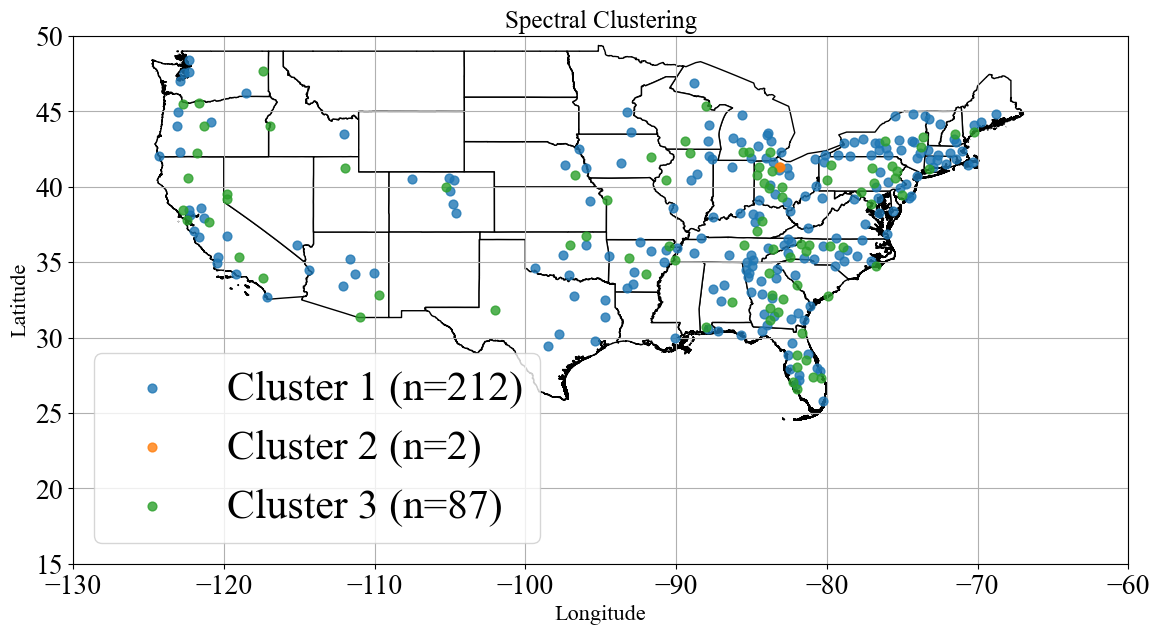


--- Label Propagation Clustering ---
Cluster 1: 99 suburbs
Cluster 2: 103 suburbs
Cluster 3: 99 suburbs
              Suburb  Cluster
150  Bloomington, IL        1
126   Tuscaloosa, AL        1
127    Kalamazoo, MI        1
128   Binghamton, NY        1
129   Fort Smith, AR        1
..               ...      ...
71        Toledo, OH        3
72        Durham, NC        3
73       Augusta, GA        3
63      Lakeland, FL        3
0       New York, NY        3

[301 rows x 2 columns]


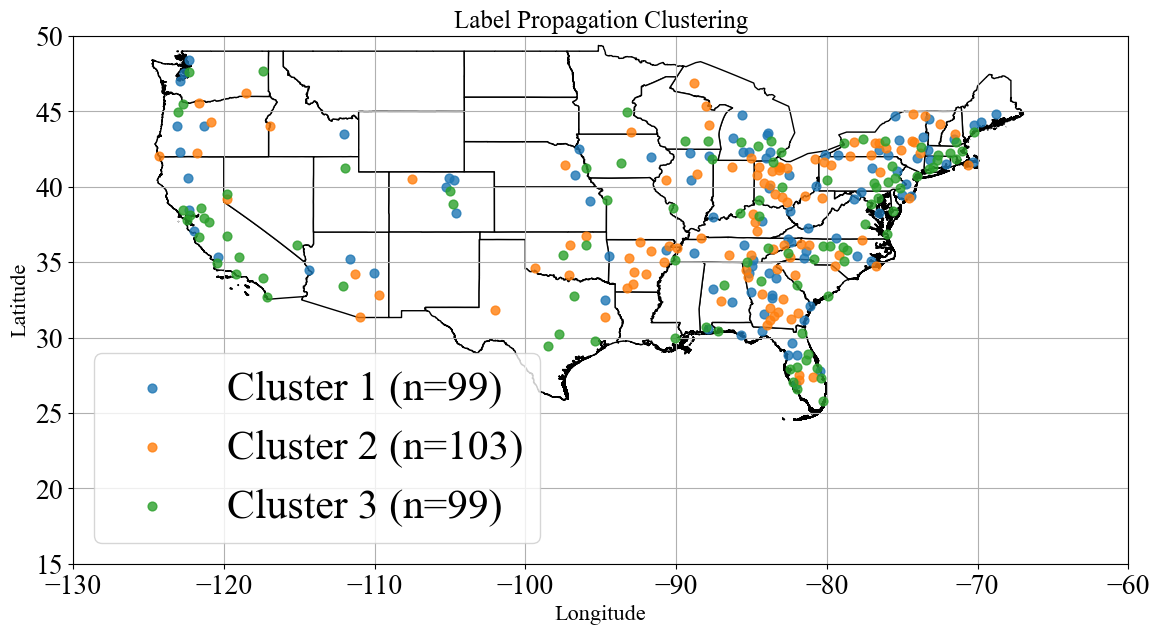


--- Hierarchical Clustering ---
Cluster 1: 54 suburbs
Cluster 2: 175 suburbs
Cluster 3: 72 suburbs
               Suburb  Cluster
300         Craig, CO        1
79        Modesto, CA        1
103        Eugene, OR        1
173  Mount Vernon, WA        1
76        Spokane, WA        1
..                ...      ...
202    Clarksburg, WV        3
201       Corning, NY        3
200    Ocean City, NJ        3
95        Reading, PA        3
0        New York, NY        3

[301 rows x 2 columns]


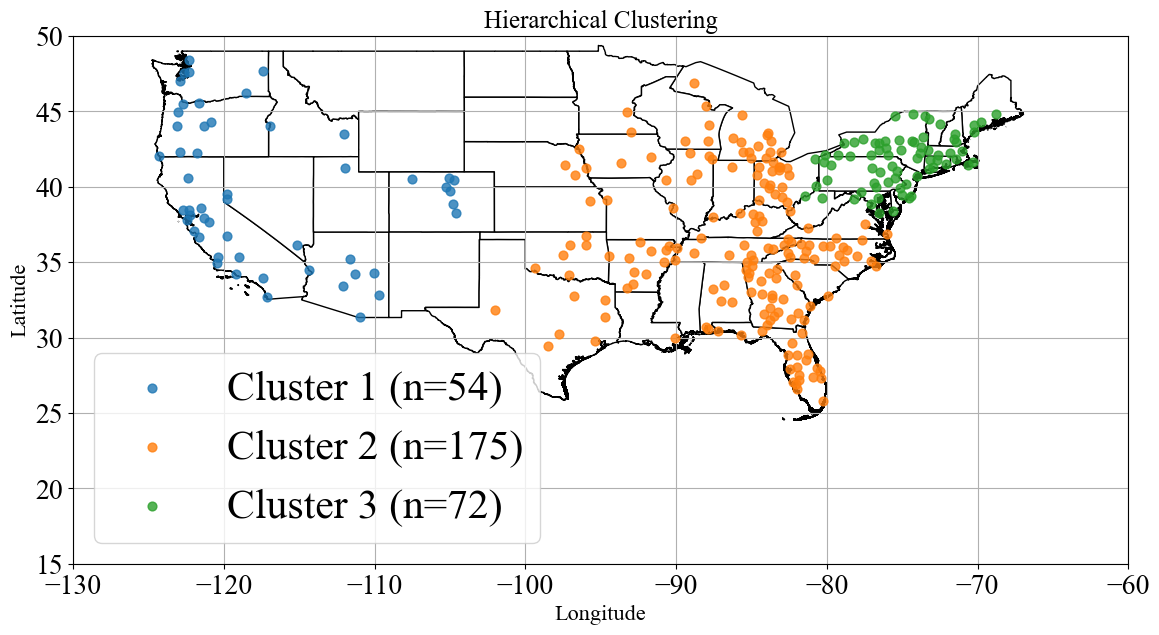

HDBSCAN found exactly 3 clusters => keep them.

--- HDBSCAN(or forced 3) Clustering ---
Cluster -1: 3 suburbs
Cluster 0: 247 suburbs
Cluster 1: 7 suburbs
Cluster 2: 44 suburbs
                Suburb  Cluster
218          Kapaa, HI       -1
155    Idaho Falls, ID       -1
152        Kahului, HI       -1
199      Ashtabula, OH        0
198    Sevierville, TN        0
..                 ...      ...
51     Bakersfield, CA        2
47          Fresno, CA        2
247         Payson, AZ        2
28       Las Vegas, NV        2
221  Klamath Falls, OR        2

[301 rows x 2 columns]


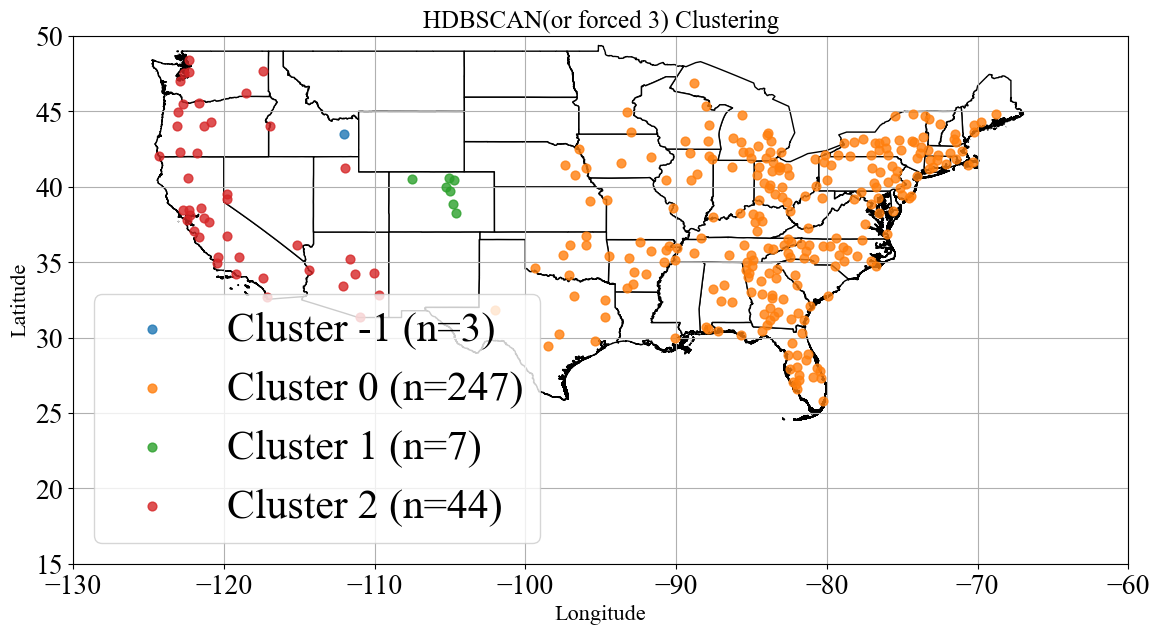


--- KMeans-on-nodeFeatures Clustering ---
Cluster 1: 54 suburbs
Cluster 2: 164 suburbs
Cluster 3: 83 suburbs
             Suburb  Cluster
300       Craig, CO        1
90      Vallejo, CA        1
86         Reno, NV        1
85   Santa Rosa, CA        1
218       Kapaa, HI        1
..              ...      ...
202  Clarksburg, WV        3
201     Corning, NY        3
200  Ocean City, NJ        3
100     Trenton, NJ        3
0      New York, NY        3

[301 rows x 2 columns]


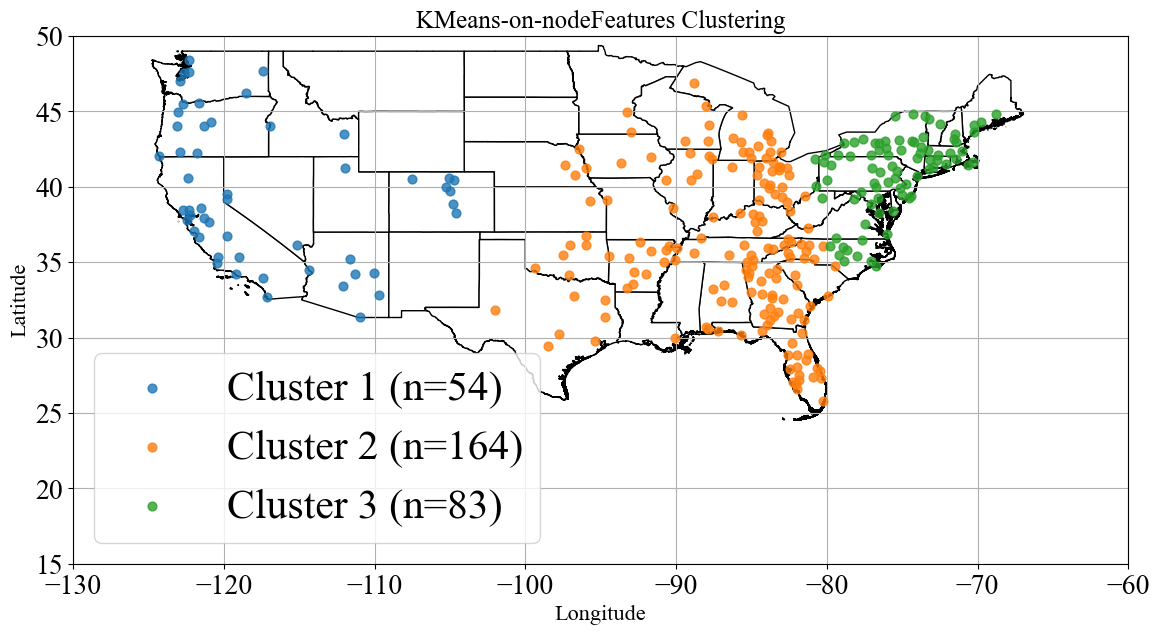

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 4995.42it/s]



--- Node2Vec + Kmeans) Clustering ---
Cluster 1: 151 suburbs
Cluster 2: 2 suburbs
Cluster 3: 148 suburbs
                Suburb  Cluster
0         New York, NY        1
118       Longview, TX        1
244       Danville, KY        1
120   Cedar Rapids, IA        1
121  Atlantic City, NJ        1
..                 ...      ...
144    Punta Gorda, FL        3
145        Redding, CA        3
147    Panama City, FL        3
299     Fitzgerald, GA        3
300          Craig, CO        3

[301 rows x 2 columns]


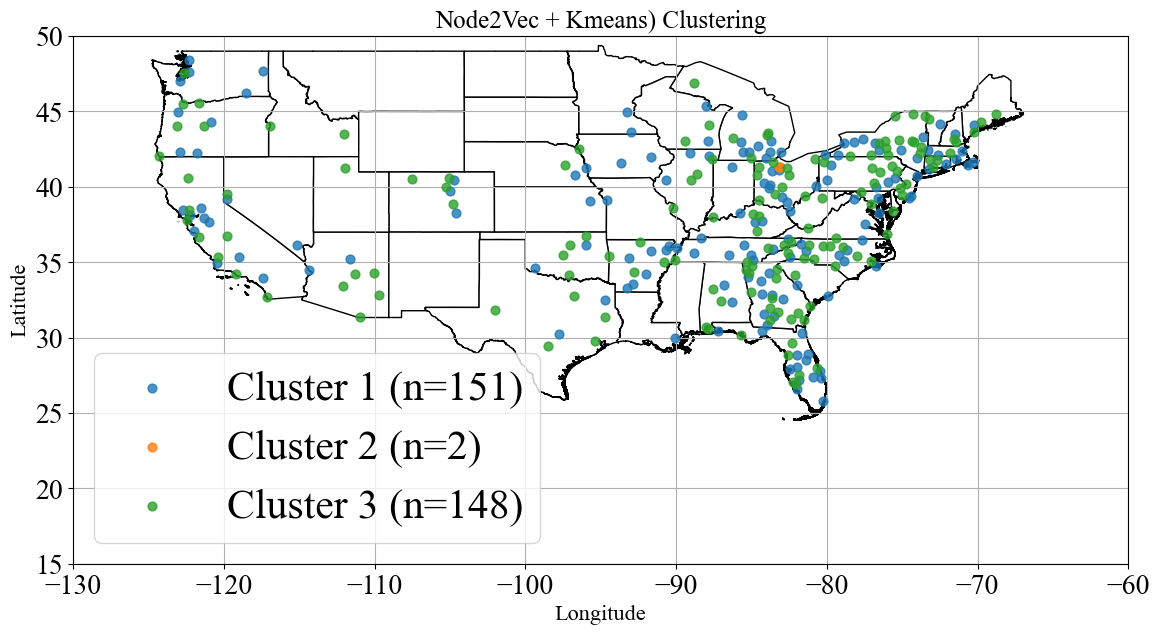

/Users/datle/miniconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)



--- GAE + Kmeans Clustering ---
Cluster 1: 185 suburbs
Cluster 2: 2 suburbs
Cluster 3: 114 suburbs
              Suburb  Cluster
0       New York, NY        1
149     Muskegon, MI        1
299   Fitzgerald, GA        1
152      Kahului, HI        1
154     Vineland, NJ        1
..               ...      ...
202   Clarksburg, WV        3
79       Modesto, CA        3
147  Panama City, FL        3
216      Findlay, OH        3
90       Vallejo, CA        3

[301 rows x 2 columns]


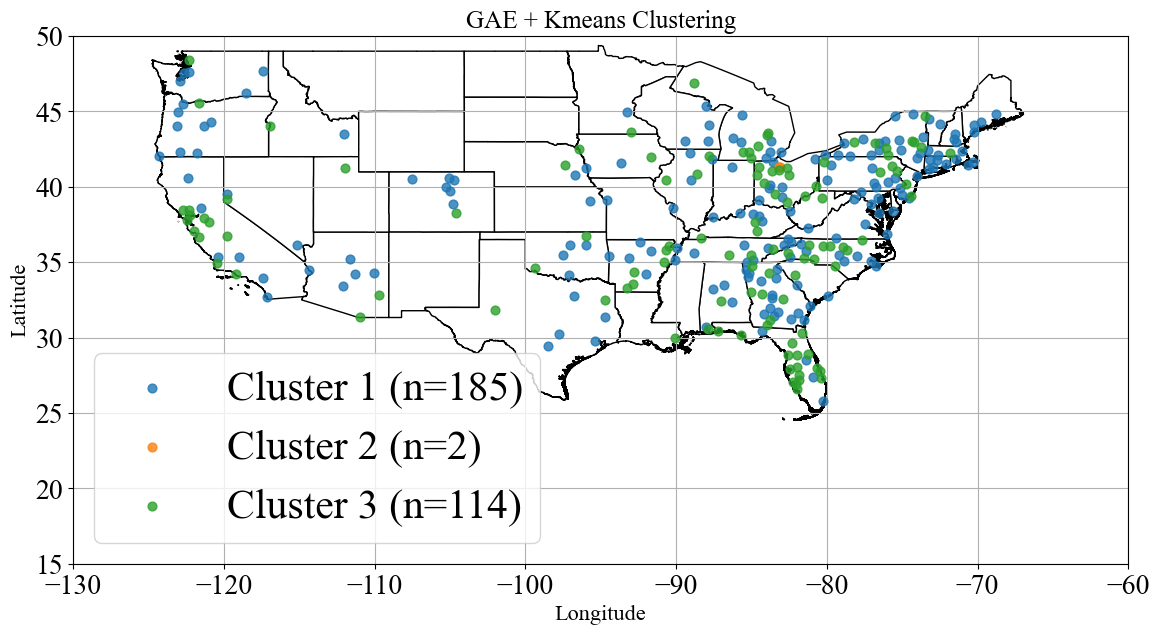

/Users/datle/miniconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)



--- GraphSAGE + Kmeans Clustering ---
Cluster 1: 199 suburbs
Cluster 2: 2 suburbs
Cluster 3: 100 suburbs
                Suburb  Cluster
0         New York, NY        1
155    Idaho Falls, ID        1
158        Concord, NH        1
159  Traverse City, MI        1
160         Bangor, ME        1
..                 ...      ...
208     Bloomsburg, PA        3
156          Niles, MI        3
47          Fresno, CA        3
48       Worcester, MA        3
207        Midland, MI        3

[301 rows x 2 columns]


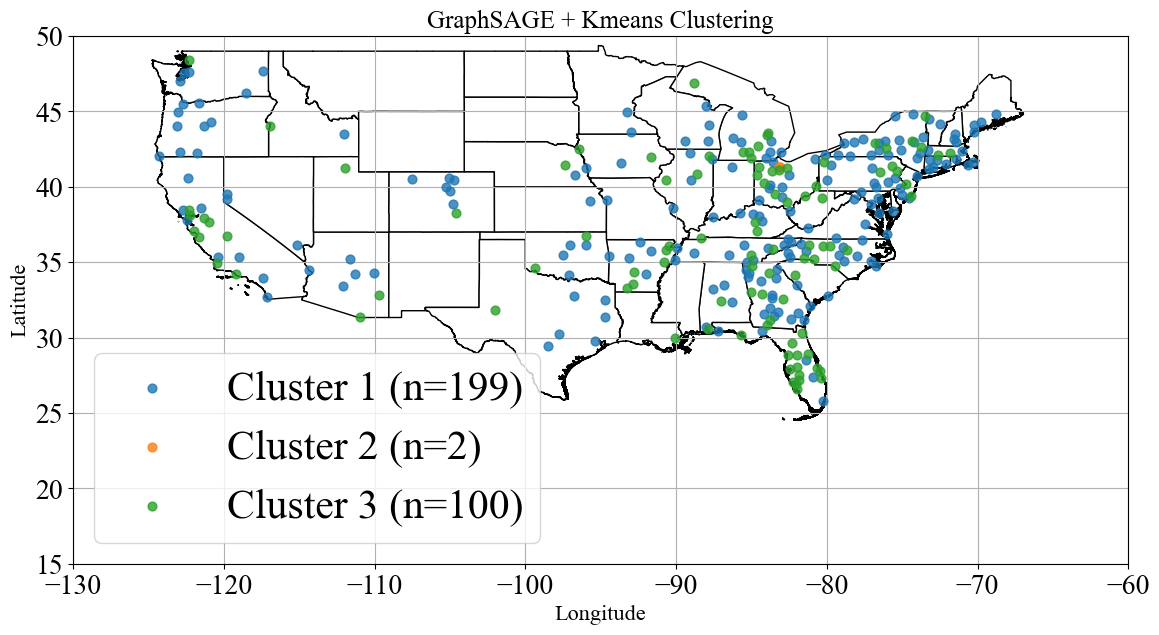

/Users/datle/miniconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)



--- VGAE + Kmeans Clustering ---
Cluster 1: 129 suburbs
Cluster 2: 2 suburbs
Cluster 3: 170 suburbs
               Suburb  Cluster
0        New York, NY        1
107  Fort Collins, CO        1
109       Lincoln, NE        1
250   Shelbyville, TN        1
249      Oil City, PA        1
..                ...      ...
151        Pueblo, CO        3
152       Kahului, HI        3
153     Sebastian, FL        3
156         Niles, MI        3
300         Craig, CO        3

[301 rows x 2 columns]


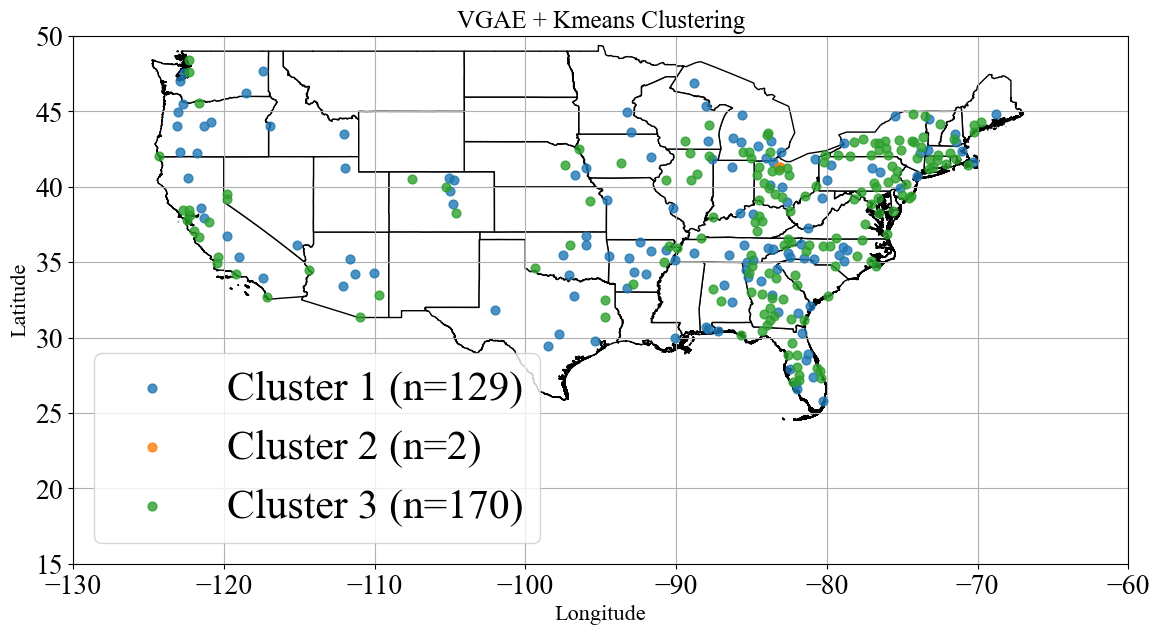


--- DGI + Kmeans Clustering ---
Cluster 1: 124 suburbs
Cluster 2: 88 suburbs
Cluster 3: 89 suburbs
                  Suburb  Cluster
114        Kingsport, TN        1
118         Longview, TX        1
119  San Luis Obispo, CA        1
120     Cedar Rapids, IA        1
121    Atlantic City, NJ        1
..                   ...      ...
134       Burlington, VT        3
135          Medford, OR        3
142    Warner Robins, GA        3
122        Bremerton, WA        3
300            Craig, CO        3

[301 rows x 2 columns]


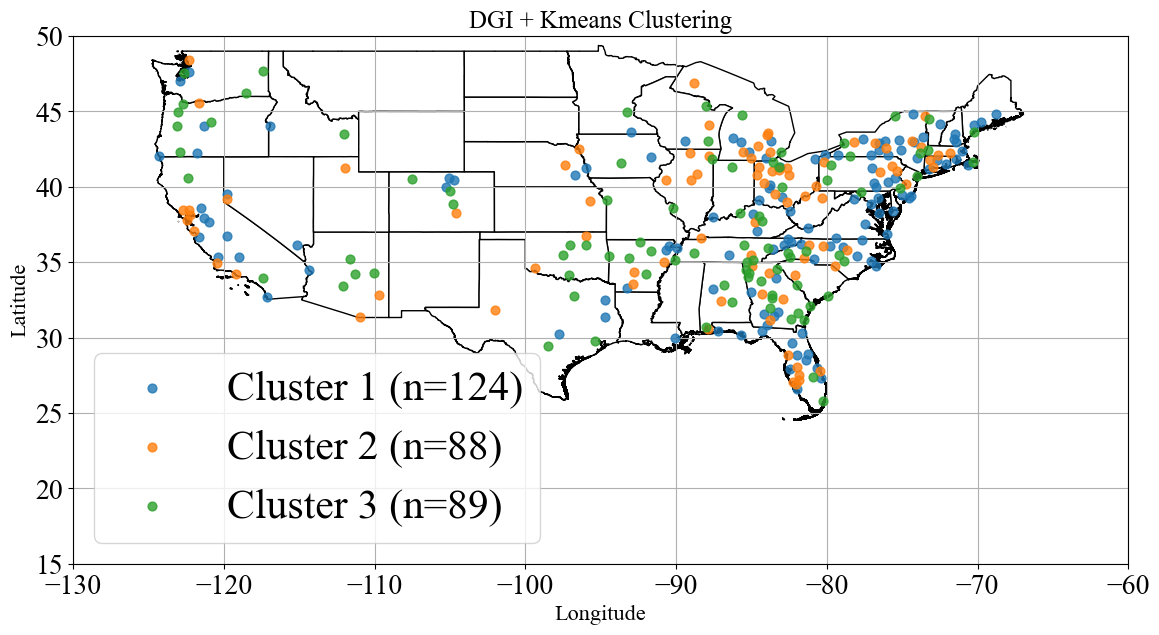

/Users/datle/miniconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)



--- ARGA + Kmeans Clustering ---
Cluster 1: 165 suburbs
Cluster 2: 2 suburbs
Cluster 3: 134 suburbs
              Suburb  Cluster
0       New York, NY        1
299   Fitzgerald, GA        1
152      Kahului, HI        1
154     Vineland, NJ        1
155  Idaho Falls, ID        1
..               ...      ...
55     Allentown, PA        3
54     New Haven, CT        3
52        Albany, NY        3
66         Ogden, UT        3
150  Bloomington, IL        3

[301 rows x 2 columns]


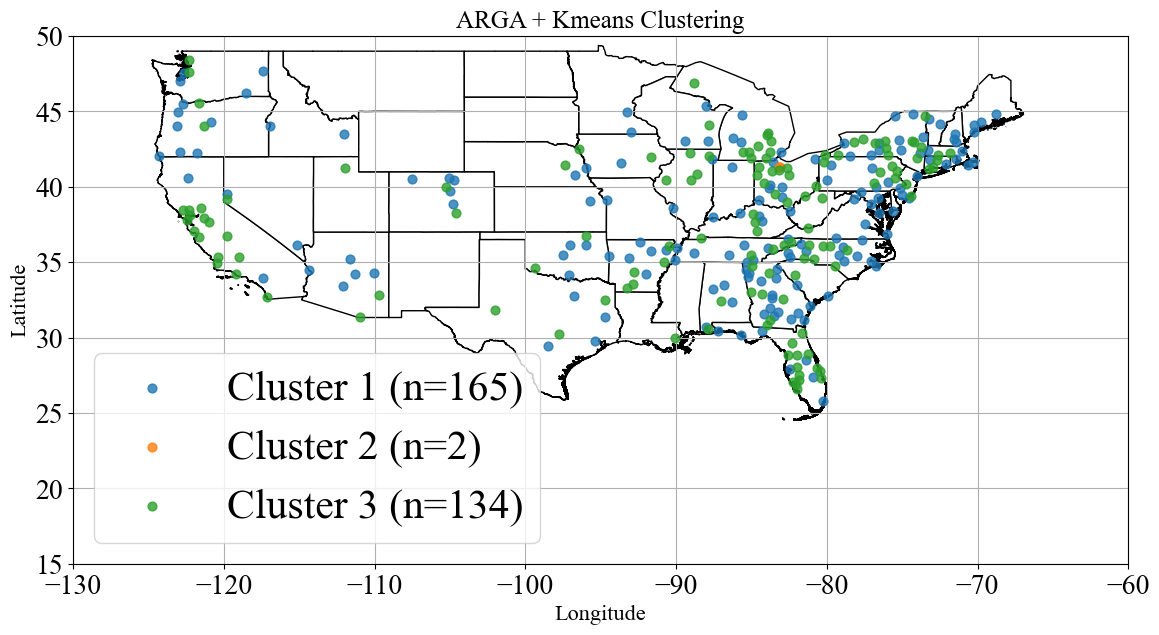


All methods completed successfully!

Final cluster results DF:
           Suburb  Spectral  LabelProp  Hierarchical  HDBSCAN  KMeans  \
0    New York, NY         1          3             3        0       3   
1     Chicago, IL         1          3             2        0       2   
2      Dallas, TX         1          3             2        0       2   
3     Houston, TX         1          3             2        0       2   
4  Washington, DC         3          3             3        0       3   

   Node2Vec  GAE  GraphSAGE  VGAE  DGI  ARGA  
0         1    1          1     1    3     1  
1         3    1          1     1    3     1  
2         3    1          1     1    3     1  
3         3    1          1     1    3     1  
4         3    1          1     3    1     1  
Saved 'all_cluster_results.csv' with each method's cluster labels, starting from 1.


In [31]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import hdbscan

from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from torch_geometric.utils import train_test_split_edges
from torch_geometric.nn import GAE, SAGEConv, DeepGraphInfomax, VGAE
from torch_geometric.nn.models.autoencoder import ARGA

############################
# 0) Set Times New Roman & Font Size
############################
plt.rcParams['font.family'] = 'Times New Roman'  # Use Times New Roman
plt.rcParams['font.size'] = 14                   # Adjust font size here if needed

############################
# 1) Function to Re-map Clusters from 0-based to 1-based
############################
def renumber_clusters_from_one(cluster_labels):
    """
    Re-maps all non-negative labels so that they start from 1 instead of 0.
    If a label is -1 (outlier), it remains -1.
    Example: [0,0,1,2,-1,2] -> [1,1,2,3,-1,3]
    """
    import numpy as np
    unique_labels = np.unique(cluster_labels)
    label_map = {}
    next_label = 1

    for old_label in unique_labels:
        if old_label == -1:
            label_map[old_label] = -1  # Keep outliers as -1
        else:
            label_map[old_label] = next_label
            next_label += 1

    new_labels = np.array([label_map[old] for old in cluster_labels])
    return new_labels

############################
# 2) Copy function for splitting
############################
def copy_data_for_splitting(original_data):
    from torch_geometric.data import Data
    new_data = Data()
    new_data.x = original_data.x.clone()
    if original_data.edge_index is not None:
        new_data.edge_index = original_data.edge_index.clone()
    return new_data

############################
# 3) Visualization & Summaries
############################
# Modify your shapefile path below:
SHAPEFILE_PATH = "/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/gadm41_USA_shp/gadm41_USA_1.shp"  # <-- Adjust to your local shapefile

def plot_clusters_on_australia_map(location_data, cluster_labels, method_name):
    """
    Plots cluster results on the map in Times New Roman, 
    with cluster counts in the legend. 
    """
    # Ensure Times New Roman is applied
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 20

    # Re-check unique clusters & counts
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    cluster_count_map = dict(zip(unique_clusters, counts))

    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    aus_map = gpd.read_file(SHAPEFILE_PATH)
    fig, ax = plt.subplots(figsize=(12, 10))
    aus_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    ax.set_xlim(-130, -60)  # Longitude range
    ax.set_ylim(15, 50)     # Latitude range

    
    for cluster in unique_clusters:
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        size = cluster_count_map[cluster]
        label_text = f"Cluster {cluster} (n={size})"
        cluster_data.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=16)
    plt.ylabel("Latitude", fontsize=16)
    plt.title(f"{method_name} Clustering", fontsize=18)
    plt.legend(fontsize=30) #-----------------------------------------------)-----------------------------------------------)-----------------------------------------------)
    plt.grid()
    plt.tight_layout()
    plt.show()



def summarize_and_visualize(cluster_labels, suburb_names, location_data, method_name):
    """
    Prints cluster distribution, then calls plot_clusters_on_australia_map.
    """
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"\n--- {method_name} Clustering ---")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"Cluster {lbl}: {cnt} suburbs")

    df_res = pd.DataFrame({"Suburb": suburb_names, "Cluster": cluster_labels}).sort_values("Cluster")
    print(df_res)
    plot_clusters_on_australia_map(location_data, cluster_labels, method_name)

############################
# 4) Additional cluster methods that return labels
############################
def label_propagation_3clusters(G_nx, suburb_names):
    import numpy as np
    communities = nx.algorithms.community.label_propagation_communities(G_nx)
    comm_list = list(communities)
    node_to_cluster = {}
    for cid, comm in enumerate(comm_list):
        for node in comm:
            node_to_cluster[node] = cid
    raw_labels = np.array([node_to_cluster[i] for i in range(len(suburb_names))])
    raw_unique = np.unique(raw_labels)

    if len(raw_unique) == 3:
        final_labels = raw_labels
    else:
        from sklearn.cluster import KMeans
        final_labels = KMeans(n_clusters=3, random_state=42).fit_predict(raw_labels.reshape(-1, 1))

    # Re-map from 0-based to 1-based
    final_labels = renumber_clusters_from_one(final_labels)
    return final_labels

def hdbscan_with_fallback_force3(node_features):
    """
    Runs HDBSCAN on node_features.
    If it produces exactly 3 clusters (and possibly -1 for outliers), 
    we keep them. 
    If it yields all -1 or yields a different number of clusters, 
    we forcibly cluster into 3 using KMeans(3).
    
    Returns a label array of length [num_nodes], with exactly 3 cluster IDs 
    (plus renumbered if you prefer).
    """
    import numpy as np
    import hdbscan
    from sklearn.cluster import KMeans

    clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
    labels = clusterer.fit_predict(node_features)  # shape [num_nodes]
    
    unique_labels = np.unique(labels)
    
    # Case 1: If HDBSCAN returns only -1 (i.e., no stable clusters):
    if len(unique_labels) == 1 and unique_labels[0] == -1:
        print("HDBSCAN found only -1 => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Case 2: If it returns some clusters, but not exactly 3 clusters
    # (we exclude -1 from counting the "real" cluster IDs)
    real_clusters = unique_labels[unique_labels != -1]
    if len(real_clusters) != 3:
        print(f"HDBSCAN gave {len(real_clusters)} non--1 clusters => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Otherwise, it found exactly 3 non--1 clusters, keep as is.
    # (Note: It might have some -1 outliers. If you want to forcibly put them 
    # into one of the 3 clusters, you'd do a fallback logic. But let's keep outliers.)
    print("HDBSCAN found exactly 3 clusters => keep them.")
    return labels

############################
# 5) GraphSAGE helper
############################
def recon_loss(z, pos_edge_index):
    row, col = pos_edge_index
    pos_pred = (z[row] * z[col]).sum(dim=-1)
    pos_loss = -F.logsigmoid(pos_pred).mean()
    n_nodes = z.size(0)
    row_neg = torch.randint(0, n_nodes, (row.size(0),), dtype=torch.long)
    col_neg = torch.randint(0, n_nodes, (col.size(0),), dtype=torch.long)
    neg_pred = (z[row_neg] * z[col_neg]).sum(dim=-1)
    neg_loss = -F.logsigmoid(-neg_pred).mean()
    return pos_loss + neg_loss

############################
# 6) GCNEncoder, VariationEncoder, MLPDiscriminator
############################
class GCNEncoder(torch.nn.Module):
    """Used by GAE / ARGA: returns 1 output."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv2 = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

class VariationalGCNEncoder(torch.nn.Module):
    """Used by VGAE: returns (mu, logstd)."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv_mu = SAGEConv(2 * out_channels, out_channels)
        self.conv_logstd = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        mu = self.conv_mu(x, edge_index)
        logstd = self.conv_logstd(x, edge_index)
        return mu, logstd

class MLPDiscriminator(torch.nn.Module):
    """For ARGA: expects z only, no edge_index."""
    def __init__(self, in_dim, hidden_dim=32):
        super().__init__()
        self.lin1 = torch.nn.Linear(in_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)
    def forward(self, z):
        x = F.relu(self.lin1(z))
        x = self.lin2(x)
        return x

class UnsupervisedGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

############################
# We assume G_nx, node_features, location_data, suburb_names, data_pyg
# are ALREADY LOADED in your environment. 
# Just run the below snippet to do clustering & re-map labels from 0 to 1, 
# with Times New Roman & adjustable font size.
############################

# Master DataFrame
df_cluster_results = pd.DataFrame({"Suburb": suburb_names})

# 1) Spectral
adj_matrix = nx.to_numpy_array(G_nx, nodelist=range(len(suburb_names)))
sc = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
spectral_labels = sc.fit_predict(adj_matrix)
spectral_labels = renumber_clusters_from_one(spectral_labels)
df_cluster_results["Spectral"] = spectral_labels
summarize_and_visualize(spectral_labels, suburb_names, location_data, "Spectral")

# 2) Label Prop => Force 3
label_prop_labels = label_propagation_3clusters(G_nx, suburb_names)
df_cluster_results["LabelProp"] = label_prop_labels
summarize_and_visualize(label_prop_labels, suburb_names, location_data, "Label Propagation")

# 3) Hierarchical
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(node_features)
agg_labels = renumber_clusters_from_one(agg_labels)
df_cluster_results["Hierarchical"] = agg_labels
summarize_and_visualize(agg_labels, suburb_names, location_data, "Hierarchical")

# 4) HDBSCAN => force 3 clusters if not
from sklearn.cluster import KMeans

hdbscan_labels = hdbscan_with_fallback_force3(node_features)
df_cluster_results["HDBSCAN"] = hdbscan_labels
summarize_and_visualize(hdbscan_labels, suburb_names, location_data, "HDBSCAN(or forced 3)")

# 5) KMeans(3) on node_features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(node_features)
kmeans_labels = renumber_clusters_from_one(kmeans_labels)
df_cluster_results["KMeans"] = kmeans_labels
summarize_and_visualize(kmeans_labels, suburb_names, location_data, "KMeans-on-nodeFeatures")

# 6) Node2Vec + KMeans
try:
    from node2vec import Node2Vec
    node2vec_model = Node2Vec(G_nx, dimensions=16, walk_length=10, num_walks=100, seed=42)
    w2v = node2vec_model.fit(window=5, min_count=1, batch_words=4)
    embeddings = []
    for i in range(len(suburb_names)):
        embeddings.append(w2v.wv[str(i)])
    embeddings = np.array(embeddings)
    node2v_labels = KMeans(n_clusters=3, random_state=42).fit_predict(embeddings)
    node2v_labels = renumber_clusters_from_one(node2v_labels)
    df_cluster_results["Node2Vec"] = node2v_labels
    summarize_and_visualize(node2v_labels, suburb_names, location_data, "Node2Vec + Kmeans)")
except ImportError:
    print("Node2Vec not installed, skipping Node2Vec+KMeans.")

# 7) GAE + KMeans
from torch_geometric.nn import GAE
data_copy_gae = copy_data_for_splitting(data_pyg)
data_split_gae = train_test_split_edges(data_copy_gae)

encoder_gae = GCNEncoder(data_split_gae.num_features, 16)
gae_model = GAE(encoder_gae)
opt_gae = torch.optim.Adam(gae_model.parameters(), lr=0.01)

for epoch in range(50):
    gae_model.train()
    opt_gae.zero_grad()
    z_gae = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
    loss_gae = gae_model.recon_loss(z_gae, data_split_gae.train_pos_edge_index)
    loss_gae.backward()
    opt_gae.step()

gae_model.eval()
with torch.no_grad():
    z_gae_final = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
emb_gae = z_gae_final.cpu().numpy()
labels_gae = KMeans(n_clusters=3, random_state=42).fit_predict(emb_gae)
labels_gae = renumber_clusters_from_one(labels_gae)
df_cluster_results["GAE"] = labels_gae
summarize_and_visualize(labels_gae, suburb_names, location_data, "GAE + Kmeans")

# 8) GraphSAGE + KMeans
data_copy_sage = copy_data_for_splitting(data_pyg)
data_split_sage = train_test_split_edges(data_copy_sage)
sage_in = data_split_sage.num_features
sage_hidden = 16
sage_model = UnsupervisedGraphSAGE(sage_in, sage_hidden)
opt_sage = torch.optim.Adam(sage_model.parameters(), lr=0.01)

for epoch in range(50):
    sage_model.train()
    opt_sage.zero_grad()
    z_sg = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
    loss_sg = recon_loss(z_sg, data_split_sage.train_pos_edge_index)
    loss_sg.backward()
    opt_sage.step()

sage_model.eval()
with torch.no_grad():
    z_sg_final = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
emb_sage = z_sg_final.cpu().numpy()
labels_sage = KMeans(n_clusters=3, random_state=42).fit_predict(emb_sage)
labels_sage = renumber_clusters_from_one(labels_sage)
df_cluster_results["GraphSAGE"] = labels_sage
summarize_and_visualize(labels_sage, suburb_names, location_data, "GraphSAGE + Kmeans")

# 9) VGAE + KMeans
from torch_geometric.nn import VGAE
data_copy_vg = copy_data_for_splitting(data_pyg)
data_split_vg = train_test_split_edges(data_copy_vg)
encoder_vg = VariationalGCNEncoder(data_split_vg.num_features, 16)
vgae_model = VGAE(encoder_vg)
opt_vg = torch.optim.Adam(vgae_model.parameters(), lr=0.01)

for epoch in range(50):
    vgae_model.train()
    opt_vg.zero_grad()
    z_vg = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
    loss_vg = vgae_model.recon_loss(z_vg, data_split_vg.train_pos_edge_index)
    loss_vg += 1e-4 * vgae_model.kl_loss()
    loss_vg.backward()
    opt_vg.step()

vgae_model.eval()
with torch.no_grad():
    z_vg_final = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
emb_vg = z_vg_final.cpu().numpy()
labels_vg = KMeans(n_clusters=3, random_state=42).fit_predict(emb_vg)
labels_vg = renumber_clusters_from_one(labels_vg)
df_cluster_results["VGAE"] = labels_vg
summarize_and_visualize(labels_vg, suburb_names, location_data, "VGAE + Kmeans")

# 10) DGI + KMeans
from torch_geometric.nn import DeepGraphInfomax

class DGIEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv = SAGEConv(in_channels, hidden_dim)
    def forward(self, x, edge_index):
        return self.conv(x, edge_index)

def corruption_fn(x, edge_index):
    return x[torch.randperm(x.size(0))], edge_index

data_copy_dgi = copy_data_for_splitting(data_pyg)
encoder_dgi = DGIEncoder(data_copy_dgi.num_features, 16)
dgi_model = DeepGraphInfomax(
    hidden_channels=16,
    encoder=encoder_dgi,
    summary=lambda z, *args, **kwargs: z.mean(dim=0),
    corruption=corruption_fn
)
opt_dgi = torch.optim.Adam(dgi_model.parameters(), lr=0.01)

for epoch in range(50):
    dgi_model.train()
    opt_dgi.zero_grad()
    pos_z, neg_z, summary = dgi_model(data_copy_dgi.x, data_copy_dgi.edge_index)
    loss_dgi = dgi_model.loss(pos_z, neg_z, summary)
    loss_dgi.backward()
    opt_dgi.step()

dgi_model.eval()
with torch.no_grad():
    z_dgi = dgi_model.encoder(data_copy_dgi.x, data_copy_dgi.edge_index)
emb_dgi = z_dgi.cpu().numpy()
labels_dgi = KMeans(n_clusters=3, random_state=42).fit_predict(emb_dgi)
labels_dgi = renumber_clusters_from_one(labels_dgi)
df_cluster_results["DGI"] = labels_dgi
summarize_and_visualize(labels_dgi, suburb_names, location_data, "DGI + Kmeans")

# 11) ARGA + KMeans
data_copy_ar = copy_data_for_splitting(data_pyg)
data_split_ar = train_test_split_edges(data_copy_ar)
encoder_ar = GCNEncoder(data_split_ar.num_features, 16)
discriminator_ar = MLPDiscriminator(16, 32)
arga_model = ARGA(encoder_ar, discriminator_ar)
opt_ar = torch.optim.Adam(arga_model.parameters(), lr=0.01)

for epoch in range(50):
    arga_model.train()
    opt_ar.zero_grad()
    z_ar = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
    loss_ar = arga_model.recon_loss(z_ar, data_split_ar.train_pos_edge_index)
    loss_ar += 1e-4 * arga_model.reg_loss(z_ar)
    loss_ar.backward()
    opt_ar.step()

arga_model.eval()
with torch.no_grad():
    z_ar_final = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
emb_ar = z_ar_final.cpu().numpy()
labels_ar = KMeans(n_clusters=3, random_state=42).fit_predict(emb_ar)
labels_ar = renumber_clusters_from_one(labels_ar)
df_cluster_results["ARGA"] = labels_ar
summarize_and_visualize(labels_ar, suburb_names, location_data, "ARGA + Kmeans")

print("\nAll methods completed successfully!")
print("\nFinal cluster results DF:")
print(df_cluster_results.head())

df_cluster_results.to_csv("all_cluster_results.csv", index=False)
print("Saved 'all_cluster_results.csv' with each method's cluster labels, starting from 1.")

In [ ]:
    # """
    # Compute 3 common internal validation metrics:
    # - Silhouette (higher is better, range ~[-1, 1])
    # - Davies–Bouldin (lower is better, >= 0)
    # - Calinski–Harabasz (higher is better, >= 0)
    # """

# Interpretation:
# 	•	High Silhouette → clusters are well separated and cohesive.
# 	•	Low Davies–Bouldin → clusters are distinct.
# 	•	High Calinski–Harabasz → cluster separation is large.
# 	•	High ARI or NMI between two methods → they produce similar partitions.
# 	•	ARI/NMI near zero → they disagree about the cluster assignments.

In [114]:
##################################
# Code to Evaluate Internal & Pairwise
##################################
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score,
    normalized_mutual_info_score
)
from itertools import combinations

def evaluate_internal(features, labels):
    sil = silhouette_score(features, labels)
    dbi = davies_bouldin_score(features, labels)
    chi = calinski_harabasz_score(features, labels)
    return {
        "Silhouette": sil,
        "Davies-Bouldin": dbi,
        "Calinski-Harabasz": chi
    }

def compare_partitions(labels_dict):
    results = []
    methods = list(labels_dict.keys())
    for m1, m2 in combinations(methods, 2):
        labs1 = labels_dict[m1]
        labs2 = labels_dict[m2]
        ari = adjusted_rand_score(labs1, labs2)
        nmi = normalized_mutual_info_score(labs1, labs2)
        results.append((m1, m2, ari, nmi))
    df_comp = pd.DataFrame(results, columns=["Method1", "Method2", "ARI", "NMI"])
    return df_comp

# 1) Build a dictionary: method -> embeddings
method_features = {
    "Spectral":     node_features,    # or the relevant features
    "LabelProp":    node_features,
    "Hierarchical": node_features,
    "HDBSCAN":      node_features,
    "KMeans":       node_features,
    "Node2Vec":     embeddings,       # from node2vec code
    "GAE":          emb_gae,
    "GraphSAGE":    emb_sage,
    "VGAE":         emb_vg,
    "DGI":          emb_dgi,
    "ARGA":         emb_ar
}

# 2) Build a dictionary: method -> cluster labels (from df_cluster_results)
method_labels = {
    "Spectral":     df_cluster_results["Spectral"].values,
    "LabelProp":    df_cluster_results["LabelProp"].values,
    "Hierarchical": df_cluster_results["Hierarchical"].values,
    "HDBSCAN":      df_cluster_results["HDBSCAN"].values,
    "KMeans":       df_cluster_results["KMeans"].values,
    "Node2Vec":     df_cluster_results["Node2Vec"].values,
    "GAE":          df_cluster_results["GAE"].values,
    "GraphSAGE":    df_cluster_results["GraphSAGE"].values,
    "VGAE":         df_cluster_results["VGAE"].values,
    "DGI":          df_cluster_results["DGI"].values,
    "ARGA":         df_cluster_results["ARGA"].values
}

# 3) Internal Validation for each method
internal_results = {}
for method, labs in method_labels.items():
    feats = method_features[method]
    scores = evaluate_internal(feats, labs)
    internal_results[method] = scores

print("\n--- Internal Validation Results ---")
for m, s in internal_results.items():
    print(m, s)

# 4) Pairwise ARI/NMI
df_ari_nmi = compare_partitions(method_labels)
print("\n--- Pairwise ARI/NMI Comparison ---")
print(df_ari_nmi)


--- Internal Validation Results ---
Spectral {'Silhouette': -0.01010358236046725, 'Davies-Bouldin': 10.975482506725292, 'Calinski-Harabasz': 1.2669146590123888}
LabelProp {'Silhouette': -0.003533926078451698, 'Davies-Bouldin': 17.858024668434307, 'Calinski-Harabasz': 3.4439818849483763}
Hierarchical {'Silhouette': 0.026223927517352315, 'Davies-Bouldin': 5.009367089946216, 'Calinski-Harabasz': 58.91058289051112}
HDBSCAN {'Silhouette': 0.048644290992527844, 'Davies-Bouldin': 4.191249523838317, 'Calinski-Harabasz': 86.54737653980554}
KMeans {'Silhouette': 0.048644290992527844, 'Davies-Bouldin': 4.191249523838317, 'Calinski-Harabasz': 86.54737653980554}
Node2Vec {'Silhouette': 0.17953587, 'Davies-Bouldin': 2.635419228207485, 'Calinski-Harabasz': 207.41744765733642}
GAE {'Silhouette': 0.6071665, 'Davies-Bouldin': 0.5033515524768822, 'Calinski-Harabasz': 8979.742727558985}
GraphSAGE {'Silhouette': 0.59468925, 'Davies-Bouldin': 0.5255345130294474, 'Calinski-Harabasz': 10079.3141056194}
VGAE 

In [ ]:
################################################################################################################################################################################
################################################################################################################################################################################
################################################################################################################################################################################
#### CLUSTERING NO ENTROPY
#### CLUSTERING NO ENTROPY
#### CLUSTERING NO ENTROPY
# Below is an example of how you can create G_nx, node_features, location_data, suburb_names, data_pyg from the original price-volume values (rather than JSD/entropy).

# 	Key Idea:
# 	1.	Read price and volume data from CSV.
# 	2.	Concatenate each suburb’s price/volume timeseries into a single node feature vector.
# 	3.	Build adjacency from lat/lon (distance < distance_threshold).
# 	4.	Return a NetworkX graph (G_nx), the node_features (price-volume stacked), the location_data, the suburb_names, and the PyTorch Geometric data_pyg.

In [44]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.metrics.pairwise import haversine_distances

from torch_geometric.data import Data
from torch_geometric.utils import to_undirected

def load_data_raw(
    price_csv="/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/price usa for clustering.csv",
    volume_csv="//Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/volume usa for clustering.csv",
    location_csv="/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/usa_city_coordinates.csv",
    distance_threshold=5
):
    """
    Loads CSVs for price, volume, location.
    Builds node features from the *original* price-volume timeseries
    (concatenated).
    Builds adjacency for edges if distance < distance_threshold (km).
    Returns:
      G_nx          : NetworkX graph
      node_features : [num_suburbs, 2*time_length] array (price+volume)
      location_data : DataFrame with lat/lon
      suburb_names  : list of node labels
      data_pyg      : PyTorch Geometric Data object (edge_index, x=node_features)
    """
    # 1) Read CSVs
    df_price = pd.read_csv(price_csv, header=0).T  # shape => [num_suburbs, time_length]
    df_volume = pd.read_csv(volume_csv, header=0).T
    location_data = pd.read_csv(location_csv)      # lat in row 0, lon in row 1

    suburb_names = location_data.columns
    price = df_price.values   # shape => [num_suburbs, time_length]
    volume = df_volume.values # shape => [num_suburbs, time_length]

    # 2) Build node_features from raw price & volume
    #    e.g., each node feature vector => [price0..priceT-1, volume0..volumeT-1]
    node_features = np.hstack((price, volume))  # shape => [num_suburbs, 2*time_length]
    # node_features = np.hstack((price))  # shape => [num_suburbs, 2*time_length]


    # 3) Build adjacency from lat/lon
    #    distance < distance_threshold => edge
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    coords_radians = np.radians(np.column_stack((latitude, longitude)))
    dist_matrix = haversine_distances(coords_radians, coords_radians) * 6371  # km

    row_idx, col_idx = np.where(dist_matrix < distance_threshold)
    # remove self-loops
    mask = row_idx != col_idx
    row_idx = row_idx[mask]
    col_idx = col_idx[mask]

    # 4) Create a NetworkX graph
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(len(suburb_names)))
    for r, c in zip(row_idx, col_idx):
        G_nx.add_edge(r, c)

    # 5) Create PyTorch Geometric Data
    edge_index = torch.tensor([row_idx, col_idx], dtype=torch.long)
    edge_index = to_undirected(edge_index)

    node_features_t = torch.tensor(node_features, dtype=torch.float32)
    data_pyg = Data(x=node_features_t, edge_index=edge_index)

    return G_nx, node_features, location_data, suburb_names, data_pyg

# Example usage:
if __name__ == "__main__":
    G_nx, node_features, location_data, suburb_names, data_pyg = load_data_raw(
    )


/Users/datle/miniconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



--- SpectralClustering(3) Clustering ---
Cluster 1: 261 suburbs
Cluster 2: 7 suburbs
Cluster 3: 33 suburbs
               Suburb  Cluster
0        New York, NY        1
180      New Bern, NC        1
181     Goldsboro, NC        1
182  Williamsport, PA        1
183     Brunswick, GA        1
..                ...      ...
254       Nogales, AZ        3
50     Bridgeport, CT        3
86           Reno, NV        3
167      Wheeling, WV        3
104     Ann Arbor, MI        3

[301 rows x 2 columns]


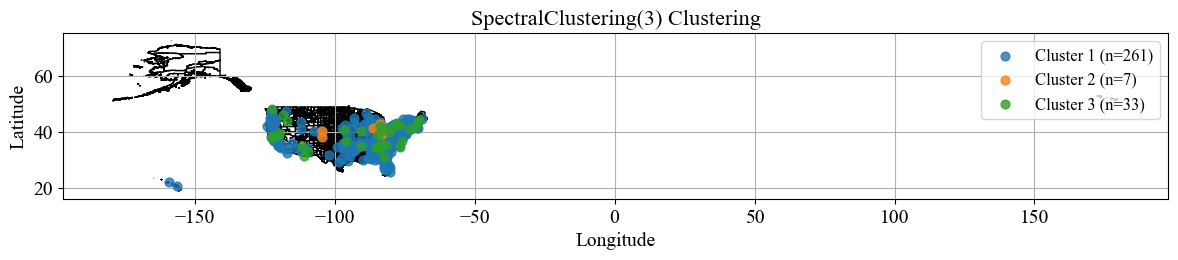


--- LabelProp(Forced3) Clustering ---
Cluster 1: 101 suburbs
Cluster 2: 101 suburbs
Cluster 3: 99 suburbs
              Suburb  Cluster
150  Bloomington, IL        1
126   Tuscaloosa, AL        1
127    Kalamazoo, MI        1
128   Binghamton, NY        1
129   Fort Smith, AR        1
..               ...      ...
70      Syracuse, NY        3
71        Toledo, OH        3
72        Durham, NC        3
74      Palm Bay, FL        3
0       New York, NY        3

[301 rows x 2 columns]


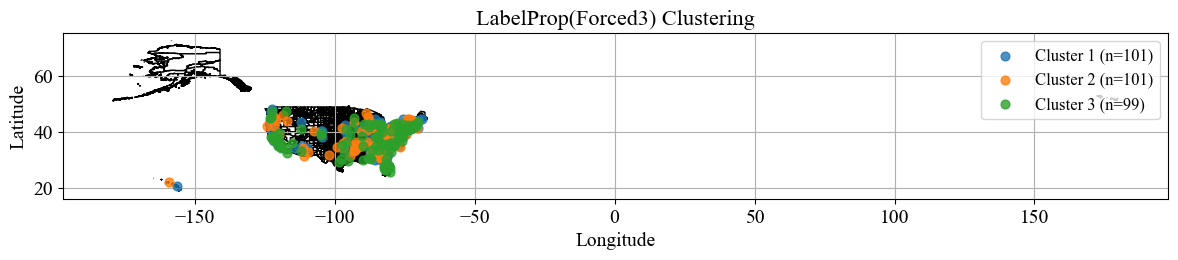


--- Hierarchical(Agg) Clustering ---
Cluster 1: 99 suburbs
Cluster 2: 190 suburbs
Cluster 3: 12 suburbs
                Suburb  Cluster
0         New York, NY        1
189       Show Low, AZ        1
93           Salem, OR        1
222  Morehead City, NC        1
90         Vallejo, CA        1
..                 ...      ...
85      Santa Rosa, CA        3
168           Napa, CA        3
56          Oxnard, CA        3
123     Santa Cruz, CA        3
92         Salinas, CA        3

[301 rows x 2 columns]


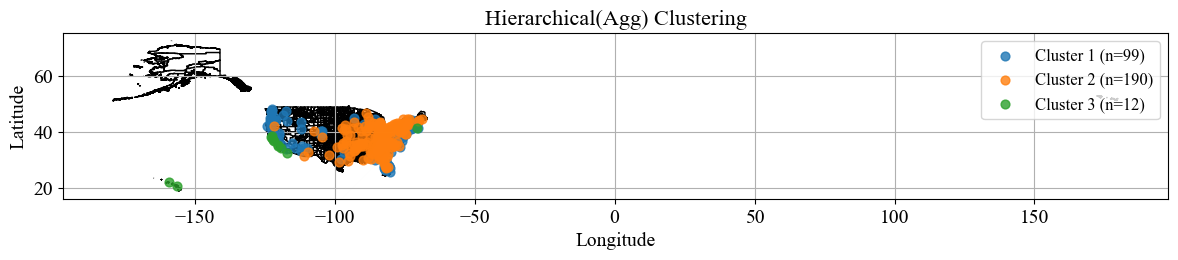

HDBSCAN gave 9 non--1 clusters => fallback to KMeans(3).

--- HDBSCAN(or forced 3) Clustering ---
Cluster 0: 97 suburbs
Cluster 1: 190 suburbs
Cluster 2: 14 suburbs
                  Suburb  Cluster
0           New York, NY        0
117          Olympia, WA        0
239      Carson City, NV        0
240          Ontario, OR        0
112          Greeley, CO        0
..                   ...      ...
92           Salinas, CA        2
91       Santa Maria, CA        2
168             Napa, CA        2
119  San Luis Obispo, CA        2
111          Boulder, CO        2

[301 rows x 2 columns]


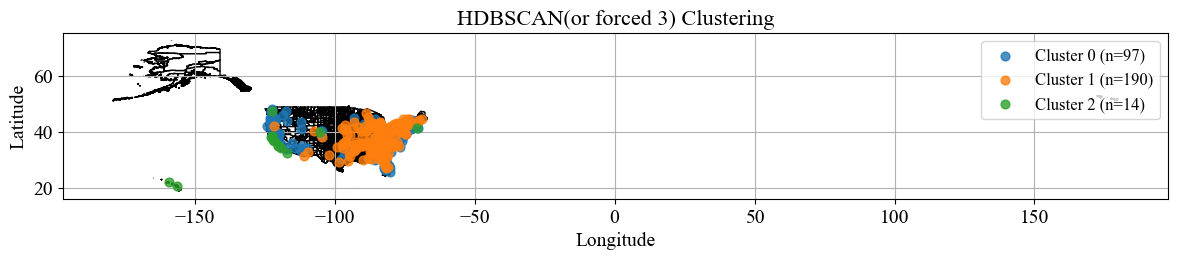


--- KMeans-on-nodeFeatures Clustering ---
Cluster 1: 97 suburbs
Cluster 2: 190 suburbs
Cluster 3: 14 suburbs
                  Suburb  Cluster
0           New York, NY        1
117          Olympia, WA        1
239      Carson City, NV        1
240          Ontario, OR        1
112          Greeley, CO        1
..                   ...      ...
92           Salinas, CA        3
91       Santa Maria, CA        3
168             Napa, CA        3
119  San Luis Obispo, CA        3
111          Boulder, CO        3

[301 rows x 2 columns]


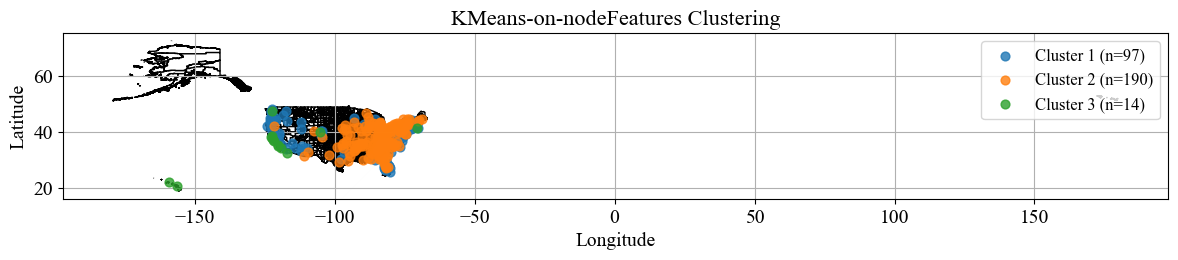

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 5924.91it/s]



--- Node2Vec+KMeans(3) Clustering ---
Cluster 1: 92 suburbs
Cluster 2: 117 suburbs
Cluster 3: 92 suburbs
              Suburb  Cluster
189     Show Low, AZ        1
123   Santa Cruz, CA        1
65   Springfield, MA        1
231       Hudson, NY        1
124         Erie, PA        1
..               ...      ...
91   Santa Maria, CA        3
201      Corning, NY        3
200   Ocean City, NJ        3
76       Spokane, WA        3
0       New York, NY        3

[301 rows x 2 columns]


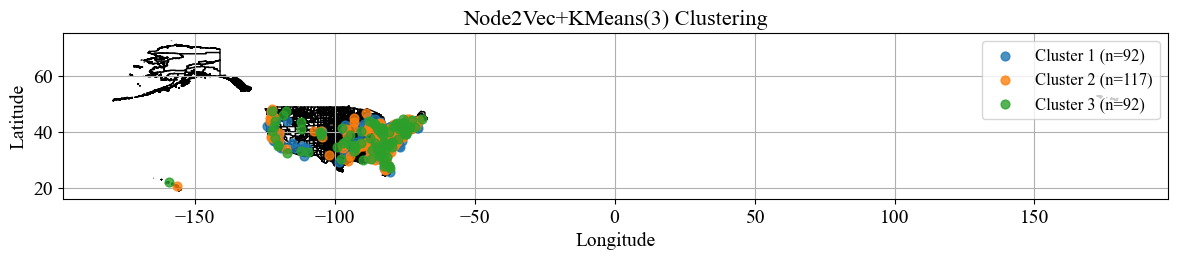

/Users/datle/miniconda3/lib/python3.12/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


IndexError: tensors used as indices must be long, int, byte or bool tensors

In [48]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import hdbscan

from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from torch_geometric.utils import train_test_split_edges
from torch_geometric.nn import GAE, SAGEConv, DeepGraphInfomax, VGAE
from torch_geometric.nn.models.autoencoder import ARGA

############################
# 0) Set Times New Roman & Font Size
############################
plt.rcParams['font.family'] = 'Times New Roman'  # Use Times New Roman
plt.rcParams['font.size'] = 14                   # Adjust font size here if needed

############################
# 1) Function to Re-map Clusters from 0-based to 1-based
############################
def renumber_clusters_from_one(cluster_labels):
    """
    Re-maps all non-negative labels so that they start from 1 instead of 0.
    If a label is -1 (outlier), it remains -1.
    Example: [0,0,1,2,-1,2] -> [1,1,2,3,-1,3]
    """
    import numpy as np
    unique_labels = np.unique(cluster_labels)
    label_map = {}
    next_label = 1

    for old_label in unique_labels:
        if old_label == -1:
            label_map[old_label] = -1  # Keep outliers as -1
        else:
            label_map[old_label] = next_label
            next_label += 1

    new_labels = np.array([label_map[old] for old in cluster_labels])
    return new_labels

############################
# 2) Copy function for splitting
############################
def copy_data_for_splitting(original_data):
    from torch_geometric.data import Data
    new_data = Data()
    new_data.x = original_data.x.clone()
    if original_data.edge_index is not None:
        new_data.edge_index = original_data.edge_index.clone()
    return new_data

############################
# 3) Visualization & Summaries
############################
# Modify your shapefile path below:
SHAPEFILE_PATH = '/Users/datle/Desktop/Deakin Uni/5th paper LLM GCN/US DATA/gadm41_USA_shp/gadm41_USA_2.shp' # <-- Adjust to your local shapefile <-- Adjust to your local shapefile <-- Adjust to your local shapefile <-- Adjust to your local shapefile <-- Adjust to your local shapefile 

def plot_clusters_on_australia_map(location_data, cluster_labels, method_name):
    """
    Plots cluster results on the map in Times New Roman, 
    with cluster counts in the legend. 
    """
    # Re-check unique clusters & counts
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    cluster_count_map = dict(zip(unique_clusters, counts))

    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    aus_map = gpd.read_file(SHAPEFILE_PATH)
    fig, ax = plt.subplots(figsize=(12, 10))
    aus_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    for cluster in unique_clusters:
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        size = cluster_count_map[cluster]
        label_text = f"Cluster {cluster} (n={size})"
        cluster_data.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.title(f"{method_name} Clustering", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

def summarize_and_visualize(cluster_labels, suburb_names, location_data, method_name):
    """
    Prints cluster distribution, then calls plot_clusters_on_australia_map.
    """
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"\n--- {method_name} Clustering ---")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"Cluster {lbl}: {cnt} suburbs")

    df_res = pd.DataFrame({"Suburb": suburb_names, "Cluster": cluster_labels}).sort_values("Cluster")
    print(df_res)
    plot_clusters_on_australia_map(location_data, cluster_labels, method_name)

############################
# 4) Additional cluster methods that return labels
############################
def label_propagation_3clusters(G_nx, suburb_names):
    import numpy as np
    communities = nx.algorithms.community.label_propagation_communities(G_nx)
    comm_list = list(communities)
    node_to_cluster = {}
    for cid, comm in enumerate(comm_list):
        for node in comm:
            node_to_cluster[node] = cid
    raw_labels = np.array([node_to_cluster[i] for i in range(len(suburb_names))])
    raw_unique = np.unique(raw_labels)

    if len(raw_unique) == 3:
        final_labels = raw_labels
    else:
        from sklearn.cluster import KMeans
        final_labels = KMeans(n_clusters=3, random_state=42).fit_predict(raw_labels.reshape(-1, 1))

    # Re-map from 0-based to 1-based
    final_labels = renumber_clusters_from_one(final_labels)
    return final_labels

def hdbscan_with_fallback_force3(node_features):
    """
    Runs HDBSCAN on node_features.
    If it produces exactly 3 clusters (and possibly -1 for outliers), 
    we keep them. 
    If it yields all -1 or yields a different number of clusters, 
    we forcibly cluster into 3 using KMeans(3).
    
    Returns a label array of length [num_nodes], with exactly 3 cluster IDs 
    (plus renumbered if you prefer).
    """
    import numpy as np
    import hdbscan
    from sklearn.cluster import KMeans

    clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
    labels = clusterer.fit_predict(node_features)  # shape [num_nodes]
    
    unique_labels = np.unique(labels)
    
    # Case 1: If HDBSCAN returns only -1 (i.e., no stable clusters):
    if len(unique_labels) == 1 and unique_labels[0] == -1:
        print("HDBSCAN found only -1 => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Case 2: If it returns some clusters, but not exactly 3 clusters
    # (we exclude -1 from counting the "real" cluster IDs)
    real_clusters = unique_labels[unique_labels != -1]
    if len(real_clusters) != 3:
        print(f"HDBSCAN gave {len(real_clusters)} non--1 clusters => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Otherwise, it found exactly 3 non--1 clusters, keep as is.
    # (Note: It might have some -1 outliers. If you want to forcibly put them 
    # into one of the 3 clusters, you'd do a fallback logic. But let's keep outliers.)
    print("HDBSCAN found exactly 3 clusters => keep them.")
    return labels

############################
# 5) GraphSAGE helper
############################
def recon_loss(z, pos_edge_index):
    row, col = pos_edge_index
    pos_pred = (z[row] * z[col]).sum(dim=-1)
    pos_loss = -F.logsigmoid(pos_pred).mean()
    n_nodes = z.size(0)
    row_neg = torch.randint(0, n_nodes, (row.size(0),), dtype=torch.long)
    col_neg = torch.randint(0, n_nodes, (col.size(0),), dtype=torch.long)
    neg_pred = (z[row_neg] * z[col_neg]).sum(dim=-1)
    neg_loss = -F.logsigmoid(-neg_pred).mean()
    return pos_loss + neg_loss

############################
# 6) GCNEncoder, VariationEncoder, MLPDiscriminator
############################
class GCNEncoder(torch.nn.Module):
    """Used by GAE / ARGA: returns 1 output."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv2 = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

class VariationalGCNEncoder(torch.nn.Module):
    """Used by VGAE: returns (mu, logstd)."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv_mu = SAGEConv(2 * out_channels, out_channels)
        self.conv_logstd = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        mu = self.conv_mu(x, edge_index)
        logstd = self.conv_logstd(x, edge_index)
        return mu, logstd

class MLPDiscriminator(torch.nn.Module):
    """For ARGA: expects z only, no edge_index."""
    def __init__(self, in_dim, hidden_dim=32):
        super().__init__()
        self.lin1 = torch.nn.Linear(in_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)
    def forward(self, z):
        x = F.relu(self.lin1(z))
        x = self.lin2(x)
        return x

class UnsupervisedGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

############################
# We assume G_nx, node_features, location_data, suburb_names, data_pyg
# are ALREADY LOADED in your environment. 
# Just run the below snippet to do clustering & re-map labels from 0 to 1, 
# with Times New Roman & adjustable font size.
############################

# Master DataFrame
df_cluster_results = pd.DataFrame({"Suburb": suburb_names})

# 1) Spectral
adj_matrix = nx.to_numpy_array(G_nx, nodelist=range(len(suburb_names)))
sc = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
spectral_labels = sc.fit_predict(adj_matrix)
spectral_labels = renumber_clusters_from_one(spectral_labels)
df_cluster_results["Spectral"] = spectral_labels
summarize_and_visualize(spectral_labels, suburb_names, location_data, "SpectralClustering(3)")

# 2) Label Prop => Force 3
label_prop_labels = label_propagation_3clusters(G_nx, suburb_names)
df_cluster_results["LabelProp"] = label_prop_labels
summarize_and_visualize(label_prop_labels, suburb_names, location_data, "LabelProp(Forced3)")

# 3) Hierarchical
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(node_features)
agg_labels = renumber_clusters_from_one(agg_labels)
df_cluster_results["Hierarchical"] = agg_labels
summarize_and_visualize(agg_labels, suburb_names, location_data, "Hierarchical(Agg)")

# 4) HDBSCAN => force 3 clusters if not
from sklearn.cluster import KMeans

hdbscan_labels = hdbscan_with_fallback_force3(node_features)
df_cluster_results["HDBSCAN"] = hdbscan_labels
summarize_and_visualize(hdbscan_labels, suburb_names, location_data, "HDBSCAN(or forced 3)")

# 5) KMeans(3) on node_features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(node_features)
kmeans_labels = renumber_clusters_from_one(kmeans_labels)
df_cluster_results["KMeans"] = kmeans_labels
summarize_and_visualize(kmeans_labels, suburb_names, location_data, "KMeans-on-nodeFeatures")

# 6) Node2Vec + KMeans
try:
    from node2vec import Node2Vec
    node2vec_model = Node2Vec(G_nx, dimensions=16, walk_length=10, num_walks=100, seed=42)
    w2v = node2vec_model.fit(window=5, min_count=1, batch_words=4)
    embeddings = []
    for i in range(len(suburb_names)):
        embeddings.append(w2v.wv[str(i)])
    embeddings = np.array(embeddings)
    node2v_labels = KMeans(n_clusters=3, random_state=42).fit_predict(embeddings)
    node2v_labels = renumber_clusters_from_one(node2v_labels)
    df_cluster_results["Node2Vec"] = node2v_labels
    summarize_and_visualize(node2v_labels, suburb_names, location_data, "Node2Vec+KMeans(3)")
except ImportError:
    print("Node2Vec not installed, skipping Node2Vec+KMeans.")

# 7) GAE + KMeans
from torch_geometric.nn import GAE
data_copy_gae = copy_data_for_splitting(data_pyg)
data_split_gae = train_test_split_edges(data_copy_gae)

encoder_gae = GCNEncoder(data_split_gae.num_features, 16)
gae_model = GAE(encoder_gae)
opt_gae = torch.optim.Adam(gae_model.parameters(), lr=0.01)

for epoch in range(50):
    gae_model.train()
    opt_gae.zero_grad()
    z_gae = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
    loss_gae = gae_model.recon_loss(z_gae, data_split_gae.train_pos_edge_index)
    loss_gae.backward()
    opt_gae.step()

gae_model.eval()
with torch.no_grad():
    z_gae_final = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
emb_gae = z_gae_final.cpu().numpy()
labels_gae = KMeans(n_clusters=3, random_state=42).fit_predict(emb_gae)
labels_gae = renumber_clusters_from_one(labels_gae)
df_cluster_results["GAE"] = labels_gae
summarize_and_visualize(labels_gae, suburb_names, location_data, "GAE+KMeans")

# 8) GraphSAGE + KMeans
data_copy_sage = copy_data_for_splitting(data_pyg)
data_split_sage = train_test_split_edges(data_copy_sage)
sage_in = data_split_sage.num_features
sage_hidden = 16
sage_model = UnsupervisedGraphSAGE(sage_in, sage_hidden)
opt_sage = torch.optim.Adam(sage_model.parameters(), lr=0.01)

for epoch in range(50):
    sage_model.train()
    opt_sage.zero_grad()
    z_sg = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
    loss_sg = recon_loss(z_sg, data_split_sage.train_pos_edge_index)
    loss_sg.backward()
    opt_sage.step()

sage_model.eval()
with torch.no_grad():
    z_sg_final = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
emb_sage = z_sg_final.cpu().numpy()
labels_sage = KMeans(n_clusters=3, random_state=42).fit_predict(emb_sage)
labels_sage = renumber_clusters_from_one(labels_sage)
df_cluster_results["GraphSAGE"] = labels_sage
summarize_and_visualize(labels_sage, suburb_names, location_data, "GraphSAGE+KMeans")

# 9) VGAE + KMeans
from torch_geometric.nn import VGAE
data_copy_vg = copy_data_for_splitting(data_pyg)
data_split_vg = train_test_split_edges(data_copy_vg)
encoder_vg = VariationalGCNEncoder(data_split_vg.num_features, 16)
vgae_model = VGAE(encoder_vg)
opt_vg = torch.optim.Adam(vgae_model.parameters(), lr=0.01)

for epoch in range(50):
    vgae_model.train()
    opt_vg.zero_grad()
    z_vg = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
    loss_vg = vgae_model.recon_loss(z_vg, data_split_vg.train_pos_edge_index)
    loss_vg += 1e-4 * vgae_model.kl_loss()
    loss_vg.backward()
    opt_vg.step()

vgae_model.eval()
with torch.no_grad():
    z_vg_final = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
emb_vg = z_vg_final.cpu().numpy()
labels_vg = KMeans(n_clusters=3, random_state=42).fit_predict(emb_vg)
labels_vg = renumber_clusters_from_one(labels_vg)
df_cluster_results["VGAE"] = labels_vg
summarize_and_visualize(labels_vg, suburb_names, location_data, "VGAE+KMeans")

# 10) DGI + KMeans
from torch_geometric.nn import DeepGraphInfomax

class DGIEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv = SAGEConv(in_channels, hidden_dim)
    def forward(self, x, edge_index):
        return self.conv(x, edge_index)

def corruption_fn(x, edge_index):
    return x[torch.randperm(x.size(0))], edge_index

data_copy_dgi = copy_data_for_splitting(data_pyg)
encoder_dgi = DGIEncoder(data_copy_dgi.num_features, 16)
dgi_model = DeepGraphInfomax(
    hidden_channels=16,
    encoder=encoder_dgi,
    summary=lambda z, *args, **kwargs: z.mean(dim=0),
    corruption=corruption_fn
)
opt_dgi = torch.optim.Adam(dgi_model.parameters(), lr=0.01)

for epoch in range(50):
    dgi_model.train()
    opt_dgi.zero_grad()
    pos_z, neg_z, summary = dgi_model(data_copy_dgi.x, data_copy_dgi.edge_index)
    loss_dgi = dgi_model.loss(pos_z, neg_z, summary)
    loss_dgi.backward()
    opt_dgi.step()

dgi_model.eval()
with torch.no_grad():
    z_dgi = dgi_model.encoder(data_copy_dgi.x, data_copy_dgi.edge_index)
emb_dgi = z_dgi.cpu().numpy()
labels_dgi = KMeans(n_clusters=3, random_state=42).fit_predict(emb_dgi)
labels_dgi = renumber_clusters_from_one(labels_dgi)
df_cluster_results["DGI"] = labels_dgi
summarize_and_visualize(labels_dgi, suburb_names, location_data, "DGI+KMeans")

# 11) ARGA + KMeans
data_copy_ar = copy_data_for_splitting(data_pyg)
data_split_ar = train_test_split_edges(data_copy_ar)
encoder_ar = GCNEncoder(data_split_ar.num_features, 16)
discriminator_ar = MLPDiscriminator(16, 32)
arga_model = ARGA(encoder_ar, discriminator_ar)
opt_ar = torch.optim.Adam(arga_model.parameters(), lr=0.01)

for epoch in range(50):
    arga_model.train()
    opt_ar.zero_grad()
    z_ar = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
    loss_ar = arga_model.recon_loss(z_ar, data_split_ar.train_pos_edge_index)
    loss_ar += 1e-4 * arga_model.reg_loss(z_ar)
    loss_ar.backward()
    opt_ar.step()

arga_model.eval()
with torch.no_grad():
    z_ar_final = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
emb_ar = z_ar_final.cpu().numpy()
labels_ar = KMeans(n_clusters=3, random_state=42).fit_predict(emb_ar)
labels_ar = renumber_clusters_from_one(labels_ar)
df_cluster_results["ARGA"] = labels_ar
summarize_and_visualize(labels_ar, suburb_names, location_data, "ARGA+KMeans(MLPDiscriminator)")

print("\nAll methods completed successfully!")
print("\nFinal cluster results DF:")
print(df_cluster_results.head())

df_cluster_results.to_csv("all_cluster_results_NO_ENTROPY_USA.csv", index=False)
print("Saved 'all_cluster_results.csv' with each method's cluster labels, starting from 1.")

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import hdbscan

from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from torch_geometric.utils import train_test_split_edges
from torch_geometric.nn import GAE, SAGEConv, DeepGraphInfomax, VGAE
from torch_geometric.nn.models.autoencoder import ARGA

############################
# 0) Set Times New Roman & Font Size
############################
plt.rcParams['font.family'] = 'Times New Roman'  # Use Times New Roman
plt.rcParams['font.size'] = 14                   # Adjust font size here if needed

############################
# 1) Function to Re-map Clusters from 0-based to 1-based
############################
def renumber_clusters_from_one(cluster_labels):
    """
    Re-maps all non-negative labels so that they start from 1 instead of 0.
    If a label is -1 (outlier), it remains -1.
    Example: [0,0,1,2,-1,2] -> [1,1,2,3,-1,3]
    """
    import numpy as np
    unique_labels = np.unique(cluster_labels)
    label_map = {}
    next_label = 1

    for old_label in unique_labels:
        if old_label == -1:
            label_map[old_label] = -1  # Keep outliers as -1
        else:
            label_map[old_label] = next_label
            next_label += 1

    new_labels = np.array([label_map[old] for old in cluster_labels])
    return new_labels

############################
# 2) Copy function for splitting
############################
def copy_data_for_splitting(original_data):
    from torch_geometric.data import Data
    new_data = Data()
    new_data.x = original_data.x.clone()
    if original_data.edge_index is not None:
        new_data.edge_index = original_data.edge_index.clone()
    return new_data

############################
# 3) Visualization & Summaries
############################
# Modify your shapefile path below:
SHAPEFILE_PATH = "/Users/datle/Desktop/Deakin Uni/ICDE Industrial track/gadm41_AUS_shp/gadm41_AUS_2.shp"  # <-- Adjust to your local shapefile

def plot_clusters_on_australia_map(location_data, cluster_labels, method_name):
    """
    Plots cluster results on the map in Times New Roman, 
    with cluster counts in the legend. 
    """
    # Re-check unique clusters & counts
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    cluster_count_map = dict(zip(unique_clusters, counts))

    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    aus_map = gpd.read_file(SHAPEFILE_PATH)
    fig, ax = plt.subplots(figsize=(12, 10))
    aus_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    for cluster in unique_clusters:
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        size = cluster_count_map[cluster]
        label_text = f"Cluster {cluster} (n={size})"
        cluster_data.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.title(f"{method_name} Clustering", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

def summarize_and_visualize(cluster_labels, suburb_names, location_data, method_name):
    """
    Prints cluster distribution, then calls plot_clusters_on_australia_map.
    """
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"\n--- {method_name} Clustering ---")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"Cluster {lbl}: {cnt} suburbs")

    df_res = pd.DataFrame({"Suburb": suburb_names, "Cluster": cluster_labels}).sort_values("Cluster")
    print(df_res)
    plot_clusters_on_australia_map(location_data, cluster_labels, method_name)

############################
# 4) Additional cluster methods that return labels
############################
def label_propagation_3clusters(G_nx, suburb_names):
    import numpy as np
    communities = nx.algorithms.community.label_propagation_communities(G_nx)
    comm_list = list(communities)
    node_to_cluster = {}
    for cid, comm in enumerate(comm_list):
        for node in comm:
            node_to_cluster[node] = cid
    raw_labels = np.array([node_to_cluster[i] for i in range(len(suburb_names))])
    raw_unique = np.unique(raw_labels)

    if len(raw_unique) == 3:
        final_labels = raw_labels
    else:
        from sklearn.cluster import KMeans
        final_labels = KMeans(n_clusters=3, random_state=42).fit_predict(raw_labels.reshape(-1, 1))

    # Re-map from 0-based to 1-based
    final_labels = renumber_clusters_from_one(final_labels)
    return final_labels

def hdbscan_with_fallback_force3(node_features):
    """
    Runs HDBSCAN on node_features.
    If it produces exactly 3 clusters (and possibly -1 for outliers), 
    we keep them. 
    If it yields all -1 or yields a different number of clusters, 
    we forcibly cluster into 3 using KMeans(3).
    
    Returns a label array of length [num_nodes], with exactly 3 cluster IDs 
    (plus renumbered if you prefer).
    """
    import numpy as np
    import hdbscan
    from sklearn.cluster import KMeans

    clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
    labels = clusterer.fit_predict(node_features)  # shape [num_nodes]
    
    unique_labels = np.unique(labels)
    
    # Case 1: If HDBSCAN returns only -1 (i.e., no stable clusters):
    if len(unique_labels) == 1 and unique_labels[0] == -1:
        print("HDBSCAN found only -1 => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Case 2: If it returns some clusters, but not exactly 3 clusters
    # (we exclude -1 from counting the "real" cluster IDs)
    real_clusters = unique_labels[unique_labels != -1]
    if len(real_clusters) != 3:
        print(f"HDBSCAN gave {len(real_clusters)} non--1 clusters => fallback to KMeans(3).")
        labels = KMeans(n_clusters=3, random_state=42).fit_predict(node_features)
        return labels
    
    # Otherwise, it found exactly 3 non--1 clusters, keep as is.
    # (Note: It might have some -1 outliers. If you want to forcibly put them 
    # into one of the 3 clusters, you'd do a fallback logic. But let's keep outliers.)
    print("HDBSCAN found exactly 3 clusters => keep them.")
    return labels

############################
# 5) GraphSAGE helper
############################
def recon_loss(z, pos_edge_index):
    row, col = pos_edge_index
    pos_pred = (z[row] * z[col]).sum(dim=-1)
    pos_loss = -F.logsigmoid(pos_pred).mean()
    n_nodes = z.size(0)
    row_neg = torch.randint(0, n_nodes, (row.size(0),), dtype=torch.long)
    col_neg = torch.randint(0, n_nodes, (col.size(0),), dtype=torch.long)
    neg_pred = (z[row_neg] * z[col_neg]).sum(dim=-1)
    neg_loss = -F.logsigmoid(-neg_pred).mean()
    return pos_loss + neg_loss

############################
# 6) GCNEncoder, VariationEncoder, MLPDiscriminator
############################
class GCNEncoder(torch.nn.Module):
    """Used by GAE / ARGA: returns 1 output."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv2 = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

class VariationalGCNEncoder(torch.nn.Module):
    """Used by VGAE: returns (mu, logstd)."""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, 2 * out_channels)
        self.conv_mu = SAGEConv(2 * out_channels, out_channels)
        self.conv_logstd = SAGEConv(2 * out_channels, out_channels)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        mu = self.conv_mu(x, edge_index)
        logstd = self.conv_logstd(x, edge_index)
        return mu, logstd

class MLPDiscriminator(torch.nn.Module):
    """For ARGA: expects z only, no edge_index."""
    def __init__(self, in_dim, hidden_dim=32):
        super().__init__()
        self.lin1 = torch.nn.Linear(in_dim, hidden_dim)
        self.lin2 = torch.nn.Linear(hidden_dim, 1)
    def forward(self, z):
        x = F.relu(self.lin1(z))
        x = self.lin2(x)
        return x

class UnsupervisedGraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_dim)
        self.conv2 = SAGEConv(hidden_dim, hidden_dim)
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

############################
# We assume G_nx, node_features, location_data, suburb_names, data_pyg
# are ALREADY LOADED in your environment. 
# Just run the below snippet to do clustering & re-map labels from 0 to 1, 
# with Times New Roman & adjustable font size.
############################

# Master DataFrame
df_cluster_results = pd.DataFrame({"Suburb": suburb_names})

# 1) Spectral
adj_matrix = nx.to_numpy_array(G_nx, nodelist=range(len(suburb_names)))
sc = SpectralClustering(n_clusters=3, affinity='precomputed', random_state=42)
spectral_labels = sc.fit_predict(adj_matrix)
spectral_labels = renumber_clusters_from_one(spectral_labels)
df_cluster_results["Spectral"] = spectral_labels
summarize_and_visualize(spectral_labels, suburb_names, location_data, "SpectralClustering(3)")

# 2) Label Prop => Force 3
label_prop_labels = label_propagation_3clusters(G_nx, suburb_names)
df_cluster_results["LabelProp"] = label_prop_labels
summarize_and_visualize(label_prop_labels, suburb_names, location_data, "LabelProp(Forced3)")

# 3) Hierarchical
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(node_features)
agg_labels = renumber_clusters_from_one(agg_labels)
df_cluster_results["Hierarchical"] = agg_labels
summarize_and_visualize(agg_labels, suburb_names, location_data, "Hierarchical(Agg)")

# 4) HDBSCAN => force 3 clusters if not
from sklearn.cluster import KMeans

hdbscan_labels = hdbscan_with_fallback_force3(node_features)
df_cluster_results["HDBSCAN"] = hdbscan_labels
summarize_and_visualize(hdbscan_labels, suburb_names, location_data, "HDBSCAN(or forced 3)")

# 5) KMeans(3) on node_features
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(node_features)
kmeans_labels = renumber_clusters_from_one(kmeans_labels)
df_cluster_results["KMeans"] = kmeans_labels
summarize_and_visualize(kmeans_labels, suburb_names, location_data, "KMeans-on-nodeFeatures")

# 6) Node2Vec + KMeans
try:
    from node2vec import Node2Vec
    node2vec_model = Node2Vec(G_nx, dimensions=16, walk_length=10, num_walks=100, seed=42)
    w2v = node2vec_model.fit(window=5, min_count=1, batch_words=4)
    embeddings = []
    for i in range(len(suburb_names)):
        embeddings.append(w2v.wv[str(i)])
    embeddings = np.array(embeddings)
    node2v_labels = KMeans(n_clusters=3, random_state=42).fit_predict(embeddings)
    node2v_labels = renumber_clusters_from_one(node2v_labels)
    df_cluster_results["Node2Vec"] = node2v_labels
    summarize_and_visualize(node2v_labels, suburb_names, location_data, "Node2Vec+KMeans(3)")
except ImportError:
    print("Node2Vec not installed, skipping Node2Vec+KMeans.")

# 7) GAE + KMeans
from torch_geometric.nn import GAE
data_copy_gae = copy_data_for_splitting(data_pyg)
data_split_gae = train_test_split_edges(data_copy_gae)

encoder_gae = GCNEncoder(data_split_gae.num_features, 16)
gae_model = GAE(encoder_gae)
opt_gae = torch.optim.Adam(gae_model.parameters(), lr=0.01)

for epoch in range(50):
    gae_model.train()
    opt_gae.zero_grad()
    z_gae = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
    loss_gae = gae_model.recon_loss(z_gae, data_split_gae.train_pos_edge_index)
    loss_gae.backward()
    opt_gae.step()

gae_model.eval()
with torch.no_grad():
    z_gae_final = gae_model.encode(data_split_gae.x, data_split_gae.train_pos_edge_index)
emb_gae = z_gae_final.cpu().numpy()
labels_gae = KMeans(n_clusters=3, random_state=42).fit_predict(emb_gae)
labels_gae = renumber_clusters_from_one(labels_gae)
df_cluster_results["GAE"] = labels_gae
summarize_and_visualize(labels_gae, suburb_names, location_data, "GAE+KMeans")

# 8) GraphSAGE + KMeans
data_copy_sage = copy_data_for_splitting(data_pyg)
data_split_sage = train_test_split_edges(data_copy_sage)
sage_in = data_split_sage.num_features
sage_hidden = 16
sage_model = UnsupervisedGraphSAGE(sage_in, sage_hidden)
opt_sage = torch.optim.Adam(sage_model.parameters(), lr=0.01)

for epoch in range(50):
    sage_model.train()
    opt_sage.zero_grad()
    z_sg = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
    loss_sg = recon_loss(z_sg, data_split_sage.train_pos_edge_index)
    loss_sg.backward()
    opt_sage.step()

sage_model.eval()
with torch.no_grad():
    z_sg_final = sage_model(data_split_sage.x, data_split_sage.train_pos_edge_index)
emb_sage = z_sg_final.cpu().numpy()
labels_sage = KMeans(n_clusters=3, random_state=42).fit_predict(emb_sage)
labels_sage = renumber_clusters_from_one(labels_sage)
df_cluster_results["GraphSAGE"] = labels_sage
summarize_and_visualize(labels_sage, suburb_names, location_data, "GraphSAGE+KMeans")

# 9) VGAE + KMeans
from torch_geometric.nn import VGAE
data_copy_vg = copy_data_for_splitting(data_pyg)
data_split_vg = train_test_split_edges(data_copy_vg)
encoder_vg = VariationalGCNEncoder(data_split_vg.num_features, 16)
vgae_model = VGAE(encoder_vg)
opt_vg = torch.optim.Adam(vgae_model.parameters(), lr=0.01)

for epoch in range(50):
    vgae_model.train()
    opt_vg.zero_grad()
    z_vg = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
    loss_vg = vgae_model.recon_loss(z_vg, data_split_vg.train_pos_edge_index)
    loss_vg += 1e-4 * vgae_model.kl_loss()
    loss_vg.backward()
    opt_vg.step()

vgae_model.eval()
with torch.no_grad():
    z_vg_final = vgae_model.encode(data_split_vg.x, data_split_vg.train_pos_edge_index)
emb_vg = z_vg_final.cpu().numpy()
labels_vg = KMeans(n_clusters=3, random_state=42).fit_predict(emb_vg)
labels_vg = renumber_clusters_from_one(labels_vg)
df_cluster_results["VGAE"] = labels_vg
summarize_and_visualize(labels_vg, suburb_names, location_data, "VGAE+KMeans")

# 10) DGI + KMeans
from torch_geometric.nn import DeepGraphInfomax

class DGIEncoder(torch.nn.Module):
    def __init__(self, in_channels, hidden_dim):
        super().__init__()
        self.conv = SAGEConv(in_channels, hidden_dim)
    def forward(self, x, edge_index):
        return self.conv(x, edge_index)

def corruption_fn(x, edge_index):
    return x[torch.randperm(x.size(0))], edge_index

data_copy_dgi = copy_data_for_splitting(data_pyg)
encoder_dgi = DGIEncoder(data_copy_dgi.num_features, 16)
dgi_model = DeepGraphInfomax(
    hidden_channels=16,
    encoder=encoder_dgi,
    summary=lambda z, *args, **kwargs: z.mean(dim=0),
    corruption=corruption_fn
)
opt_dgi = torch.optim.Adam(dgi_model.parameters(), lr=0.01)

for epoch in range(50):
    dgi_model.train()
    opt_dgi.zero_grad()
    pos_z, neg_z, summary = dgi_model(data_copy_dgi.x, data_copy_dgi.edge_index)
    loss_dgi = dgi_model.loss(pos_z, neg_z, summary)
    loss_dgi.backward()
    opt_dgi.step()

dgi_model.eval()
with torch.no_grad():
    z_dgi = dgi_model.encoder(data_copy_dgi.x, data_copy_dgi.edge_index)
emb_dgi = z_dgi.cpu().numpy()
labels_dgi = KMeans(n_clusters=3, random_state=42).fit_predict(emb_dgi)
labels_dgi = renumber_clusters_from_one(labels_dgi)
df_cluster_results["DGI"] = labels_dgi
summarize_and_visualize(labels_dgi, suburb_names, location_data, "DGI+KMeans")

# 11) ARGA + KMeans
data_copy_ar = copy_data_for_splitting(data_pyg)
data_split_ar = train_test_split_edges(data_copy_ar)
encoder_ar = GCNEncoder(data_split_ar.num_features, 16)
discriminator_ar = MLPDiscriminator(16, 32)
arga_model = ARGA(encoder_ar, discriminator_ar)
opt_ar = torch.optim.Adam(arga_model.parameters(), lr=0.01)

for epoch in range(50):
    arga_model.train()
    opt_ar.zero_grad()
    z_ar = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
    loss_ar = arga_model.recon_loss(z_ar, data_split_ar.train_pos_edge_index)
    loss_ar += 1e-4 * arga_model.reg_loss(z_ar)
    loss_ar.backward()
    opt_ar.step()

arga_model.eval()
with torch.no_grad():
    z_ar_final = arga_model.encode(data_split_ar.x, data_split_ar.train_pos_edge_index)
emb_ar = z_ar_final.cpu().numpy()
labels_ar = KMeans(n_clusters=3, random_state=42).fit_predict(emb_ar)
labels_ar = renumber_clusters_from_one(labels_ar)
df_cluster_results["ARGA"] = labels_ar
summarize_and_visualize(labels_ar, suburb_names, location_data, "ARGA+KMeans(MLPDiscriminator)")

print("\nAll methods completed successfully!")
print("\nFinal cluster results DF:")
print(df_cluster_results.head())

df_cluster_results.to_csv("all_cluster_results.csv", index=False)
print("Saved 'all_cluster_results.csv' with each method's cluster labels, starting from 1.")

checkpoint directory created: ./model
saving model version 0.0

--- Clustering Results ---
                                 Suburb  Cluster
0                        Aberfoyle Park        1
900                         Lakes Creek        1
901                      Lakes Entrance        1
904                        Landsborough        1
905                          Langwarrin        1
...                                 ...      ...
1402  Rose Bay - Vaucluse - Watsons Bay        3
117           Bayview - Elanora Heights        3
797                Innaloo - Doubleview        3
1416  Royal Park - Hendon - Albert Park        3
501                       Dover Heights        3

[1695 rows x 2 columns]


/var/folders/l_/49ttdyg530b2jkzpjbhr0tsh0000gp/T/ipykernel_35133/3767683170.py:127: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cluster_centroid = cluster_data.geometry.unary_union.centroid
/var/folders/l_/49ttdyg530b2jkzpjbhr0tsh0000gp/T/ipykernel_35133/3767683170.py:127: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cluster_centroid = cluster_data.geometry.unary_union.centroid
/var/folders/l_/49ttdyg530b2jkzpjbhr0tsh0000gp/T/ipykernel_35133/3767683170.py:127: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  cluster_centroid = cluster_data.geometry.unary_union.centroid


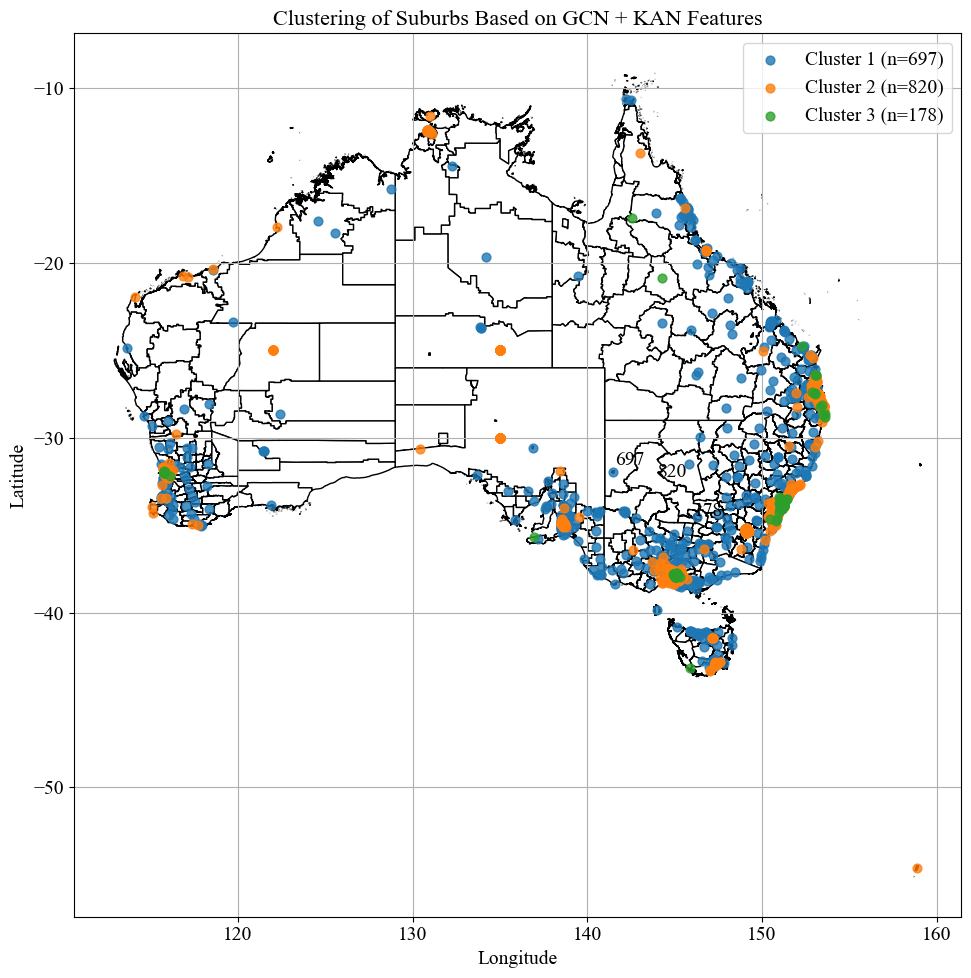

In [22]:
import random
import numpy as np
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from sklearn.cluster import KMeans
from torch_geometric.nn import GCNConv
from kan import KAN  # Ensure pykan is installed

# Assuming `graph_data`, `location_data`, and `suburb_names` are preloaded from the first script

# Set seeds for reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

cudnn.deterministic = True
cudnn.benchmark = False

# ------------------- GCN Model -------------------
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_idx = data.x, data.edge_index
        x = self.conv1(x, edge_idx)
        x = F.relu(x)
        x = self.conv2(x, edge_idx)
        return x

gcn_model = GCN(
    in_channels=graph_data.x.shape[1],
    hidden_channels=32,
    out_channels=graph_data.x.shape[1]
)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.01)
criterion = nn.MSELoss()

gcn_model.train()
for epoch in range(100):
    optimizer.zero_grad()
    output = gcn_model(graph_data)
    loss = criterion(output, graph_data.x)
    loss.backward()
    optimizer.step()

gcn_model.eval()
with torch.no_grad():
    gcn_embeddings = gcn_model(graph_data).numpy()

# ------------------- KAN -------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
gcn_embeddings_tensor = torch.tensor(gcn_embeddings, dtype=torch.float32, device=device)

in_dim = gcn_embeddings.shape[1]
out_dim = 32

class KAN_Encoder(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        self.kan = KAN(width=[in_dim, 1, 1], grid=1, k=2, seed=seed, device=device)
        self.final_fc = nn.Linear(1, hidden_dim)

    def forward(self, x):
        y_kan = self.kan(x)
        y_out = self.final_fc(y_kan)
        return y_out

kan_encoder = KAN_Encoder(in_dim, out_dim).to(device)
kan_encoder.eval()
with torch.no_grad():
    kan_embeddings_torch = kan_encoder(gcn_embeddings_tensor)
    kan_embeddings = kan_embeddings_torch.cpu().numpy()

# ------------------- K-Means Clustering -------------------
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(kan_embeddings)

# Adjust cluster_labels to start from 1
cluster_labels += 1  # Shift cluster indices to start from 1

cluster_results = pd.DataFrame({'Suburb': suburb_names, 'Cluster': cluster_labels})
print("\n--- Clustering Results ---")
print(cluster_results.sort_values(by='Cluster'))

# ------------------- Visualization -------------------
def plot_clusters(location_data, cluster_labels, shapefile_path, font="Times New Roman", font_size=12):
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    australia_map = gpd.read_file(shapefile_path)

    fig, ax = plt.subplots(figsize=(12, 10))
    australia_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    cluster_counts = cluster_results['Cluster'].value_counts().sort_index()

    for cluster_val in np.unique(cluster_labels):
        cluster_data = suburbs_gdf[suburbs_gdf['Cluster'] == cluster_val]
        count = cluster_counts.get(cluster_val, 0)  # Use .get() to handle missing keys
        cluster_data.plot(ax=ax, markersize=40, label=f"Cluster {cluster_val} (n={count})", alpha=0.8, zorder=2)

        # Calculate cluster centroid for label placement
        if not cluster_data.empty:  # Ensure the cluster_data is not empty
            cluster_centroid = cluster_data.geometry.unary_union.centroid
            ax.text(
                cluster_centroid.x,
                cluster_centroid.y,
                f"{count}",
                fontsize=font_size,
                fontname=font,
                color="black",
                ha="center",
                zorder=3
            )

    plt.xlabel("Longitude", fontsize=font_size, fontname=font)
    plt.ylabel("Latitude", fontsize=font_size, fontname=font)
    plt.title("Clustering of Suburbs Based on GCN + KAN Features", fontsize=font_size + 2, fontname=font)
    plt.legend(fontsize=font_size)
    plt.grid()
    plt.tight_layout()
    plt.show()

# Replace with your actual shapefile path
shapefile_path = "/Users/datle/Desktop/Deakin Uni/ICDE Industrial track/gadm41_AUS_shp/gadm41_AUS_2.shp"  # <-- Adjust to your local shapefile
plot_clusters(location_data, cluster_labels, shapefile_path, font="Times New Roman", font_size=14)

In [ ]:
shapefile_path = "/Users/datle/Desktop/Deakin Uni/ICDE Industrial track/gadm41_AUS_shp/gadm41_AUS_2.shp"  # <-- Adjust to your local shapefile


In [ ]:
############## CLUSTERING USING PURE GRAPHS WIHOUTH KMEANS
############## CLUSTERING USING PURE GRAPHS WIHOUTH KMEANS
############## CLUSTERING USING PURE GRAPHS WIHOUTH KMEANS
############## CLUSTERING USING PURE GRAPHS WIHOUTH KMEANS
############## CLUSTERING USING PURE GRAPHS WIHOUTH KMEANS



In [73]:
#############################################################
# 1) Imports & Data Loading
#############################################################
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from scipy import stats
from scipy.stats import entropy
from sklearn.metrics.pairwise import haversine_distances, cosine_similarity

# If Node2Vec is not installed, do: pip install node2vec
try:
    from node2vec import Node2Vec
except ImportError:
    print("Please install node2vec: pip install node2vec")

# (Optional) If you want to do label prop from Nx
# or advanced community detection from CDlib, e.g.:
# pip install python-igraph cdlib

##########################################
# 2) Load Data + Build Original Graph
##########################################
def load_data(
    price_csv="df_RF_price_filtered.csv",
    volume_csv="df_RF_volume_filtered.csv",
    location_csv="df_location_filtered.csv",
    window_size=20,
    distance_threshold=10
):
    """
    Loads CSV data for price, volume, location.
    Computes JSD-based features per suburb => node_features.
    Builds Nx graph if dist < distance_threshold km.
    Returns (G_nx, node_features, location_data, suburb_names).
    """
    # 2.1) CSV reading
    df_RF_price = pd.read_csv(price_csv, header=0).T
    df_RF_volume = pd.read_csv(volume_csv, header=0).T
    location_data = pd.read_csv(location_csv)
    
    suburb_names = location_data.columns
    price = df_RF_price.values
    volume = df_RF_volume.values
    
    # 2.2) Compute rolling JSD
    num_windows = price.shape[1] - window_size + 1
    jsd_windows = np.zeros((num_windows, price.shape[0]))
    for i in range(num_windows):
        window_prices = price[:, i : i + window_size]
        window_volumes = volume[:, i : i + window_size]
        jsd_pairs = np.zeros(price.shape[0])
        for j in range(price.shape[0]):
            try:
                price_pdf = stats.gaussian_kde(window_prices[j])
                volume_pdf = stats.gaussian_kde(window_volumes[j])
                p_dist = price_pdf(window_prices[j])
                v_dist = volume_pdf(window_volumes[j])
                avg_dist = 0.5 * (p_dist + v_dist)
                jsd_val = 0.5 * (
                    entropy(p_dist, avg_dist) + 
                    entropy(v_dist, avg_dist)
                )
                jsd_pairs[j] = jsd_val
            except np.linalg.LinAlgError:
                jsd_pairs[j] = 0
        jsd_windows[i] = jsd_pairs

    # node_features => shape [num_suburbs, num_windows]
    node_features = jsd_windows.T
    
    # 2.3) Build adjacency from lat/lon (for original G_nx)
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    coords = np.column_stack((latitude, longitude))
    lat_lon_radians = np.radians(coords)
    distances = haversine_distances(lat_lon_radians, lat_lon_radians) * 6371
    
    row_idx, col_idx = np.where(distances < distance_threshold)
    mask = row_idx != col_idx
    row_idx = row_idx[mask]
    col_idx = col_idx[mask]
    
    G_nx = nx.Graph()
    G_nx.add_nodes_from(range(len(suburb_names)))
    for r, c in zip(row_idx, col_idx):
        G_nx.add_edge(r, c)
    
    return G_nx, node_features, location_data, suburb_names



In [ ]:
##########################################
# 3) Labeling Helper to renumber clusters
##########################################
def renumber_clusters_from_one(cluster_labels):
    """
    Re-maps all non-negative labels so that they start from 1 instead of 0.
    If a label is -1 (outlier), it stays -1.
    """
    unique_labels = np.unique(cluster_labels)
    label_map = {}
    next_label = 1
    for old_label in unique_labels:
        if old_label == -1:
            label_map[old_label] = -1
        else:
            label_map[old_label] = next_label
            next_label += 1
    new_labels = np.array([label_map[old] for old in cluster_labels])
    return new_labels

##########################################
# 4) Visualization: plot on map
##########################################
def plot_clusters_on_australia_map(
    location_data, cluster_labels, method_name,
    shapefile_path="/Users/datle/Desktop/Deakin Uni/ICDE Industrial track/gadm41_AUS_shp/gadm41_AUS_2.shp"
):
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    cluster_count_map = dict(zip(unique_clusters, counts))
    
    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()
    
    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )
    
    aus_map = gpd.read_file(shapefile_path)
    fig, ax = plt.subplots(figsize=(12, 10))
    aus_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)
    
    for cluster in unique_clusters:
        cdata = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        size = cluster_count_map[cluster]
        label_text = f"Cluster {cluster} (n={size})"
        cdata.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.title(f"{method_name} Clustering", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

def summarize_and_visualize(
    cluster_labels, suburb_names, location_data, method_name
):
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"\n--- {method_name} Clustering ---")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"Cluster {lbl}: {cnt} suburbs")

    df_res = pd.DataFrame({
        "Suburb": suburb_names, 
        "Cluster": cluster_labels
    }).sort_values("Cluster")
    print(df_res)
    plot_clusters_on_australia_map(
        location_data, cluster_labels, method_name
    )

##########################################
# 5) Build adjacency from embeddings
##########################################
def build_graph_from_embeddings(embeddings, threshold=0.8):
    """
    Creates a new Nx Graph from embeddings by thresholding
    cosine similarity. Edges if sim > threshold, skipping self-loops.
    """
    sim_matrix = cosine_similarity(embeddings)  # shape [N, N]
    N = embeddings.shape[0]
    
    G_embed = nx.Graph()
    G_embed.add_nodes_from(range(N))
    
    row_idx, col_idx = np.where(sim_matrix > threshold)
    for r, c in zip(row_idx, col_idx):
        if r != c:
            G_embed.add_edge(r, c)
    
    return G_embed

def label_propagation_embed(G_embed):
    """
    Simple example: label propagation on the embedding-derived adjacency.
    """
    communities = nx.algorithms.community.label_propagation_communities(G_embed)
    comm_list = list(communities)
    node_to_cluster = {}
    for cid, comm in enumerate(comm_list):
        for node in comm:
            node_to_cluster[node] = cid
    raw_labels = np.array([node_to_cluster[i] for i in range(len(G_embed))])
    return raw_labels

##########################################
# 6) Main: Node2Vec => build adjacency => label prop
##########################################
if __name__ == "__main__":
    # # A) Load data
    # G_nx, node_features, location_data, suburb_names = load_data(
    #     price_csv="df_RF_price_filtered.csv",
    #     volume_csv="df_RF_volume_filtered.csv",
    #     location_csv="df_location_filtered.csv",
    #     window_size=20,
    #     distance_threshold=10
    # )

    # B) Node2Vec => embeddings
    from node2vec import Node2Vec
    node2vec_model = Node2Vec(
        G_nx, dimensions=16, walk_length=10, 
        num_walks=100, seed=42
    )
    w2v = node2vec_model.fit(window=5, min_count=1, batch_words=4)
    embeddings = []
    for i in range(len(suburb_names)):
        embeddings.append(w2v.wv[str(i)])
    embeddings = np.array(embeddings)  # shape [num_nodes, 16]

    # C) Build adjacency from embeddings
    # Try threshold=0.8 or adapt
    G_embed = build_graph_from_embeddings(embeddings, threshold=0.8)

    # D) Label propagation on the new adjacency
    labels_lp = label_propagation_embed(G_embed)

    # E) Re-map from 0-based => 1-based
    labels_lp = renumber_clusters_from_one(labels_lp)

    # F) Summarize & visualize
    summarize_and_visualize(labels_lp, suburb_names, location_data, "Node2Vec+EmbedLabelProp")

    # (Optional) If you want to store in a DataFrame with other methods:
    df_cluster_results = pd.DataFrame({
        "Suburb": suburb_names, 
        "Node2Vec_EmbedLP": labels_lp
    })
    print("\nFinal cluster results DF:")
    print(df_cluster_results.head())

    # If you want a different approach to community detection (Girvan–Newman, etc.), 
    # just replace label_propagation_embed(...) with your desired method.

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:04<00:00, 22.51it/s]


** Fallback to KMeans was used for the final 3 clusters. **

--- Node2Vec+EmbedLabelProp(3clust) Clustering ---
Cluster 1: 237 suburbs
Cluster 2: 1267 suburbs
Cluster 3: 191 suburbs
                      Suburb  Cluster
847                    Kelso        1
507                  Dromana        1
673              Goonellabah        1
672              Goondiwindi        1
671     Goolwa - Port Elliot        1
...                      ...      ...
1295          Phillip Island        3
1558         Tamworth - East        3
1559        Tamworth - North        3
941   Little Grove - Elleker        3
1694    Woodford - D'Aguilar        3

[1695 rows x 2 columns]


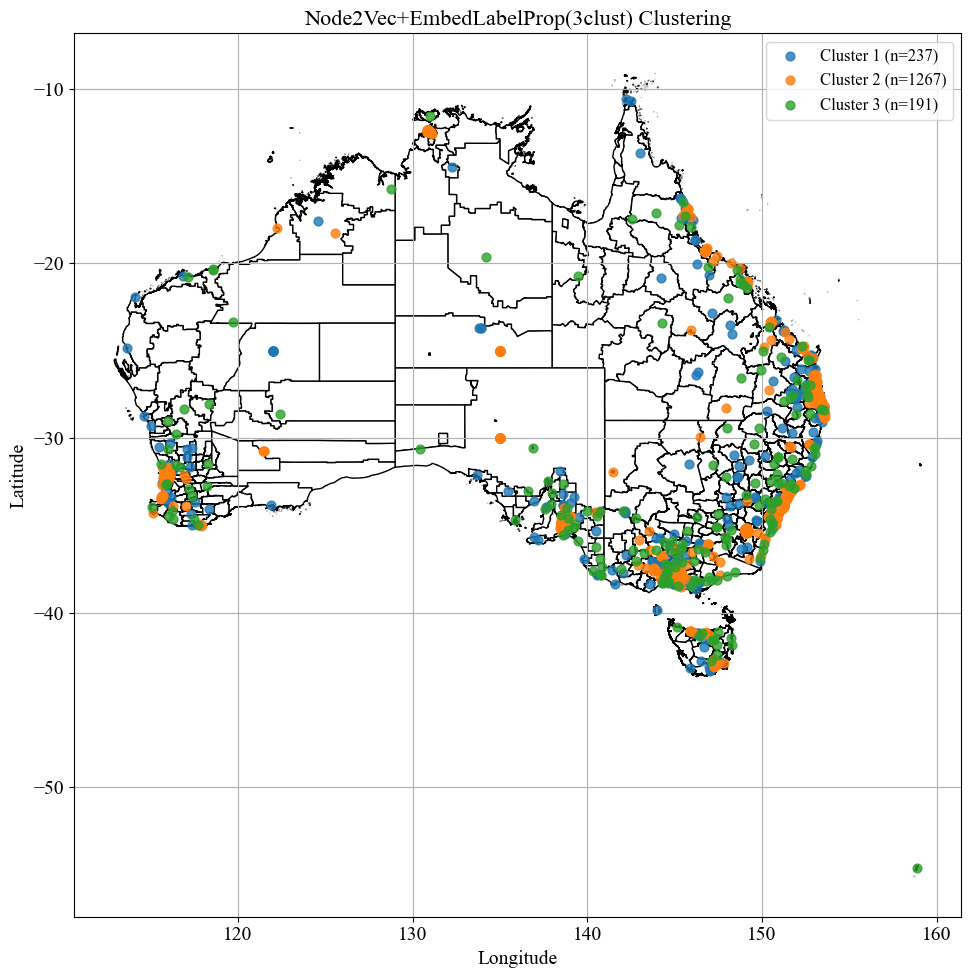


Final cluster results DF:
                 Suburb  Node2Vec_EmbedLP_3clust
0        Aberfoyle Park                        2
1        Acacia Gardens                        2
2  Acton - Upper Burnie                        2
3    Adamstown - Kotara                        2
4              Adelaide                        2


In [77]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from sklearn.metrics.pairwise import cosine_similarity
from node2vec import Node2Vec

##########################################
# 1) Force exactly 3 clusters from Label Prop
##########################################
def label_propagation_3clusters_embed(G_embed, n_clusters=3):
    """
    Runs label propagation on an embedding-derived adjacency graph.
    If the result is not exactly n_clusters, forcibly re-clusters
    the node 'community IDs' with KMeans(n_clusters).
    
    Returns:
      final_labels : final cluster labels (integer array)
      used_fallback: bool indicating whether fallback KMeans was used
    """
    import numpy as np
    from sklearn.cluster import KMeans

    # 1) Raw label propagation
    communities = nx.algorithms.community.label_propagation_communities(G_embed)
    comm_list = list(communities)  # list of sets
    
    node_to_comm = {}
    for cid, comm in enumerate(comm_list):
        for node in comm:
            node_to_comm[node] = cid

    raw_labels = np.array([node_to_comm[i] for i in range(len(G_embed.nodes))])
    unique_comms = np.unique(raw_labels)
    
    # 2) Check how many communities
    used_fallback = False
    if len(unique_comms) == n_clusters:
        # Great, we already have exactly 3 sets
        final_labels = raw_labels
    else:
        # Fallback: forcibly cluster the "community IDs" into n_clusters
        used_fallback = True
        forced_labels = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(
            raw_labels.reshape(-1, 1)
        )
        final_labels = forced_labels

    return final_labels, used_fallback

##########################################
# 2) Renumbering from 0-based => 1-based
##########################################
def renumber_clusters_from_one(cluster_labels):
    """
    Re-maps all non-negative labels so that they start from 1 instead of 0.
    If a label is -1, it stays -1.
    """
    unique_labels = np.unique(cluster_labels)
    label_map = {}
    next_label = 1
    for old_label in unique_labels:
        if old_label == -1:
            label_map[old_label] = -1
        else:
            label_map[old_label] = next_label
            next_label += 1
    new_labels = np.array([label_map[old] for old in cluster_labels])
    return new_labels

##########################################
# 3) Plot & Summaries
##########################################
def plot_clusters_on_australia_map(
    location_data, cluster_labels, method_name,
    shapefile_path="/Users/datle/Desktop/Deakin Uni/ICDE Industrial track/gadm41_AUS_shp/gadm41_AUS_2.shp"
):
    unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
    cluster_count_map = dict(zip(unique_clusters, counts))

    latitude = location_data.iloc[0].values
    longitude = location_data.iloc[1].values
    suburb_names = location_data.columns.tolist()

    suburbs_gdf = gpd.GeoDataFrame(
        {
            'Suburb': suburb_names,
            'Latitude': latitude,
            'Longitude': longitude,
            'Cluster': cluster_labels
        },
        geometry=gpd.points_from_xy(longitude, latitude)
    )

    aus_map = gpd.read_file(shapefile_path)
    fig, ax = plt.subplots(figsize=(12, 10))
    aus_map.plot(ax=ax, color='white', edgecolor='black', zorder=1)

    for cluster in unique_clusters:
        cdata = suburbs_gdf[suburbs_gdf['Cluster'] == cluster]
        size = cluster_count_map[cluster]
        label_text = f"Cluster {cluster} (n={size})"
        cdata.plot(ax=ax, markersize=40, label=label_text, alpha=0.8, zorder=2)

    plt.xlabel("Longitude", fontsize=14)
    plt.ylabel("Latitude", fontsize=14)
    plt.title(f"{method_name} Clustering", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    plt.tight_layout()
    plt.show()

def summarize_and_visualize(cluster_labels, suburb_names, location_data, method_name):
    unique_labels, counts = np.unique(cluster_labels, return_counts=True)
    print(f"\n--- {method_name} Clustering ---")
    for lbl, cnt in zip(unique_labels, counts):
        print(f"Cluster {lbl}: {cnt} suburbs")

    df_res = pd.DataFrame({
        "Suburb": suburb_names,
        "Cluster": cluster_labels
    }).sort_values("Cluster")
    print(df_res)
    plot_clusters_on_australia_map(location_data, cluster_labels, method_name)

##########################################
# 4) Build adjacency from embeddings
##########################################
def build_graph_from_embeddings(embeddings, threshold=0.8):
    """
    Creates a Nx Graph from embeddings by thresholding cosine similarity > threshold.
    """
    sim_matrix = cosine_similarity(embeddings)  # shape [N, N]
    N = embeddings.shape[0]

    G_embed = nx.Graph()
    G_embed.add_nodes_from(range(N))

    row_idx, col_idx = np.where(sim_matrix > threshold)
    for r, c in zip(row_idx, col_idx):
        if r != c:
            G_embed.add_edge(r, c)

    return G_embed

##########################################
# 5) Main: Node2Vec => 3-cluster label prop
##########################################
if __name__ == "__main__":
    # We'll assume you already have G_nx, suburb_names, location_data 
    # from your load_data or other logic. For demonstration, let's pretend
    # it's already defined in your environment.

    # Node2Vec => embeddings
    node2vec_model = Node2Vec(
        G_nx, dimensions=16, walk_length=10,
        num_walks=100, seed=42
    )
    w2v = node2vec_model.fit(window=5, min_count=1, batch_words=4)
    embeddings = []
    for i in range(len(suburb_names)):
        embeddings.append(w2v.wv[str(i)])
    embeddings = np.array(embeddings)  # shape [num_nodes, 16]

    # Build adjacency from embeddings
    G_embed = build_graph_from_embeddings(embeddings, threshold=0.8)

    # Force exactly 3 clusters via label_propagation_3clusters_embed
    raw_lp, used_fallback = label_propagation_3clusters_embed(G_embed, n_clusters=3)

    # Renumber from 1-based
    final_labels = renumber_clusters_from_one(raw_lp)

    # Summarize & visualize
    if used_fallback:
        print("** Fallback to KMeans was used for the final 3 clusters. **")
    else:
        print("** Direct label propagation gave exactly 3 clusters. **")

    summarize_and_visualize(final_labels, suburb_names, location_data, "Node2Vec+EmbedLabelProp(3clust)")

    # Optional: store in DataFrame
    df_cluster_results = pd.DataFrame({
        "Suburb": suburb_names,
        "Node2Vec_EmbedLP_3clust": final_labels
    })
    print("\nFinal cluster results DF:")
    print(df_cluster_results.head())